In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

### In the EDA 1 notebook I discovered that the time intervals of the cellcounts are uneven. Therefore I plan to make 2 different "smoothed" versions to apply time series algorithms. 1.) Going to organize the data by month, taking the averages. 2.) Going to do a rolling average of 30 days which should make the time intervals even.

### Vast majority of the data is from florida so I will be preparing florida to train on

In [2]:
ab = pd.read_csv('../data/habsos_20230714.csv', parse_dates=['SAMPLE_DATE'])
ab = ab.sort_values(by=['SAMPLE_DATE'])
ab = ab.dropna(subset=['SALINITY','WATER_TEMP'], how='any')
abfl = ab.loc[ab.STATE_ID=='FL'].copy()

C:\Users\Peter Doze\AppData\Local\Temp\ipykernel_23852\3409152836.py:1: DtypeWarning: Columns (18,19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  ab = pd.read_csv('../data/habsos_20230714.csv', parse_dates=['SAMPLE_DATE'])


### Mean by Month

In [3]:
abflgroup = abfl.groupby([abfl.SAMPLE_DATE.dt.year, abfl.SAMPLE_DATE.dt.month])\
    [['CELLCOUNT','SALINITY','WATER_TEMP','SAMPLE_DEPTH']].mean()
abflgroup.head()

CELLCOUNT   SALINITY  WATER_TEMP  SAMPLE_DEPTH
SAMPLE_DATE SAMPLE_DATE                                                
1954        2                  0.0  33.382500   19.225000      1.971875
            3                  0.0  32.411935   21.022581      1.806452
            4                  0.0  32.448182   26.670455      2.811364
            5                  0.0  32.781290   28.161290      1.374194
            6                  0.0  32.319610   29.468831      3.657143

In [4]:
abfl.groupby(abfl.SAMPLE_DATE.dt.month)[['CELLCOUNT','SALINITY','WATER_TEMP','SAMPLE_DEPTH']].mean()

CELLCOUNT   SALINITY  WATER_TEMP  SAMPLE_DEPTH
SAMPLE_DATE                                                    
1             54346.603720  31.059349   17.922153      2.110551
2             82677.598301  31.037911   19.382641      1.824070
3             20171.611416  31.270704   21.128328      1.804977
4             15611.647510  31.604300   23.694983      1.993678
5             26604.333333  31.912085   26.759782      1.926261
6             34296.502374  31.526549   29.225250      2.154594
7             48023.108757  30.819125   30.232673      2.063742
8             89207.549777  29.822875   30.311651      2.171586
9             80019.664601  29.309724   29.105700      2.280154
10           120512.188515  30.560228   26.142702      2.117832
11           213611.471960  31.032670   22.407487      2.157146
12            48966.631677  31.204493   19.561592      1.874218

In [5]:
ab2 = abflgroup.copy()


In [6]:
idx = [datetime(i[0],i[1],1) for i in abflgroup.index]

In [7]:
ab2.index = idx
ab2.head()

CELLCOUNT   SALINITY  WATER_TEMP  SAMPLE_DEPTH
1954-02-01        0.0  33.382500   19.225000      1.971875
1954-03-01        0.0  32.411935   21.022581      1.806452
1954-04-01        0.0  32.448182   26.670455      2.811364
1954-05-01        0.0  32.781290   28.161290      1.374194
1954-06-01        0.0  32.319610   29.468831      3.657143

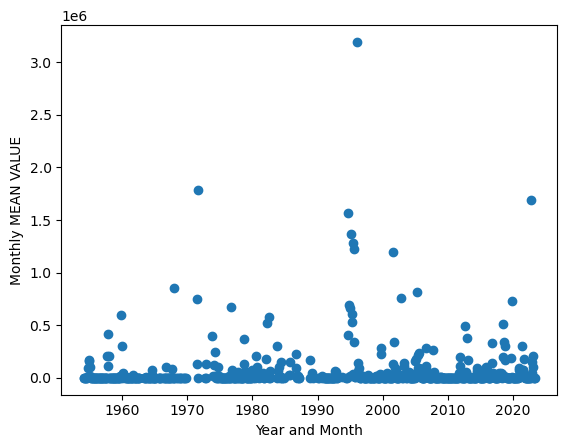

In [8]:
plt.scatter(ab2.index, ab2.CELLCOUNT)
plt.xlabel('Year and Month')
plt.ylabel('Monthly MEAN VALUE')
plt.show()

### Rolling Average

In [9]:
delta = timedelta(days=30)
print(abfl.SAMPLE_DATE.min(), abfl.SAMPLE_DATE.max(), timedelta(days=30))

1954-02-05 08:55:00 2023-06-29 16:29:00 30 days, 0:00:00


In [10]:
ab3 = abfl.copy()

In [11]:
ab3.set_index('SAMPLE_DATE', inplace=True)

In [12]:
#https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects for code for time difference
cellavg = ab3.CELLCOUNT.rolling(delta, min_periods=1).mean()

In [13]:
for i, j in enumerate(cellavg):
    print(i, j)

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.0
61 0.0
62 0.0
63 0.0
64 0.0
65 0.0
66 0.0
67 0.0
68 0.0
69 0.0
70 0.0
71 0.0
72 0.0
73 0.0
74 0.0
75 0.0
76 0.0
77 0.0
78 0.0
79 0.0
80 0.0
81 0.0
82 0.0
83 0.0
84 0.0
85 0.0
86 0.0
87 0.0
88 0.0
89 0.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 0.0
103 0.0
104 0.0
105 0.0
106 0.0
107 0.0
108 0.0
109 0.0
110 0.0
111 0.0
112 0.0
113 0.0
114 0.0
115 0.0
116 0.0
117 0.0
118 0.0
119 0.0
120 0.0
121 0.0
122 0.0
123 0.0
124 0.0
125 0.0
126 0.0
127 0.0
128 0.0
129 0.0
130 0.0
131 0.0
132 0.0
133 0.0
134 0.0
135 0.0
136 0.0
137 0.0
138 0.

17283 0.0
17284 0.0
17285 0.0
17286 0.0
17287 0.0
17288 0.0
17289 0.0
17290 0.0
17291 0.0
17292 0.0
17293 0.0
17294 0.0
17295 0.0
17296 0.0
17297 0.0
17298 0.0
17299 0.0
17300 0.0
17301 0.0
17302 0.0
17303 0.0
17304 0.0
17305 0.0
17306 0.0
17307 0.0
17308 0.0
17309 0.0
17310 0.0
17311 0.0
17312 0.0
17313 0.0
17314 0.0
17315 0.0
17316 0.0
17317 0.0
17318 0.0
17319 0.0
17320 0.0
17321 0.0
17322 0.0
17323 0.0
17324 0.0
17325 0.0
17326 0.0
17327 0.0
17328 47000.0
17329 74500.0
17330 67000.0
17331 365250.0
17332 292220.0
17333 244072.16666666666
17334 209204.7142857143
17335 183054.125
17336 162714.77777777778
17337 146443.3
17338 133130.27272727274
17339 122036.08333333333
17340 112648.69230769231
17341 104602.35714285714
17342 97628.86666666667
17343 91527.0625
17344 86143.11764705883
17345 81357.38888888889
17346 81128.05263157895
17347 77521.65
17348 73830.14285714286
17349 70474.22727272728
17350 67410.13043478261
17351 64601.375
17352 62017.32
17353 59632.03846153846
17354 57423.44444

59343 51916.111405835545
59344 51394.814323607425
59345 51260.613756613755
59346 51125.36147757256
59347 50983.8654353562
59348 50983.8654353562
59349 50412.39417989418
59350 49544.79521276596
59351 49413.376657824934
59352 49282.65343915344
59353 49152.62005277045
59354 46102.254010695186
59355 45979.314666666665
59356 45857.02925531915
59357 45735.3925729443
59358 45614.39947089947
59359 45841.95744680851
59360 45720.36074270557
59361 45599.40740740741
59362 45479.09234828496
59363 45359.41052631579
59364 45240.35695538058
59365 45121.92670157068
59366 45004.114882506525
59367 44886.916666666664
59368 44770.32727272727
59369 48023.58507462686
59370 47880.65773809524
59371 47880.65773809524
59372 47738.578635014834
59373 47597.34023668639
59374 47456.93510324484
59375 47317.35588235294
59376 47178.59530791789
59377 47046.494152046784
59378 46909.33236151603
59379 47049.13081395349
59380 46913.72173913044
59381 46779.09537572254
59382 46644.28530259366
59383 46510.25
59384 46389.398280

75526 693395.1895734597
75527 692351.9794952681
75528 691297.8818897638
75529 690226.1352201258
75530 689142.5777080063
75531 688062.4169278997
75532 686985.6369327074
75533 685912.221875
75534 684843.7160686428
75535 683776.9813084112
75536 682713.5645412131
75537 681653.450310559
75538 680596.623255814
75539 679762.3808049535
75540 678711.743431221
75541 677664.862654321
75542 676620.6949152543
75543 675585.8938461539
75544 674550.6881720431
75545 673516.1012269938
75546 672484.6830015314
75547 671456.4189602446
75548 670431.2946564886
75549 669409.2957317074
75550 668390.4079147641
75551 667374.6170212766
75552 666361.908952959
75553 665352.2696969697
75554 664345.6853252647
75555 656712.6123076923
75556 656712.6123076923
75557 655704.8617511521
75558 658740.0185185185
75559 658740.0185185185
75560 657727.5793528506
75561 658742.5910493827
75562 639565.8486739469
75563 641263.3159557662
75564 641093.0396825396
75565 640173.1152
75566 640034.9519230769
75567 639423.4517684887
75568 6

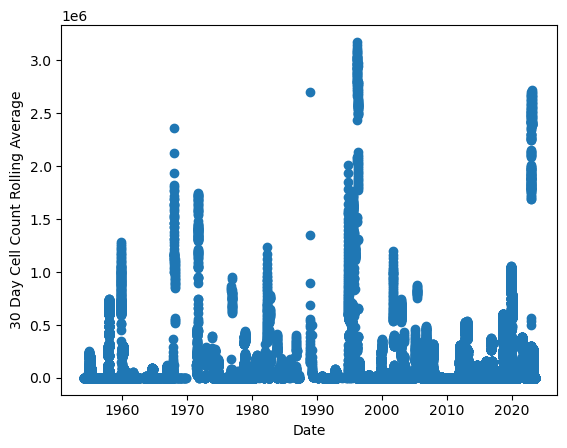

In [14]:
plt.scatter(ab3.index, cellavg)
plt.xlabel('Date')
plt.ylabel('30 Day Cell Count Rolling Average')
plt.show()

## Ok now I have my per month mean ab2 and my (30 day) rolling average ab3 lets see if I can see some seasonality now.

### ab2 seasonality

In [36]:
from statsmodels.graphics.tsaplots import plot_acf

Text(0.5, 1.0, 'Lag of 13 months')

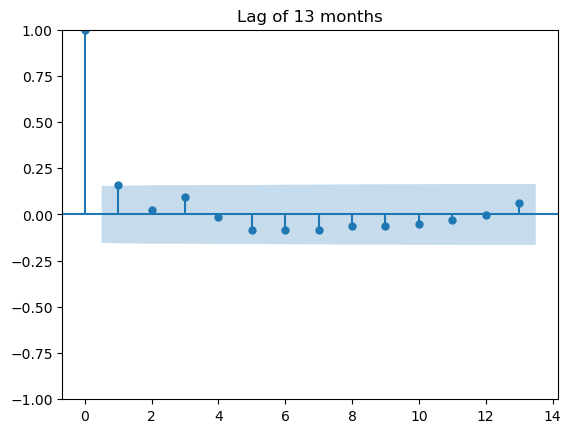

In [37]:
months=13
plot_acf(ab2.CELLCOUNT.loc[ab2.index > datetime(2010,1,1)], lags= months, alpha=0.05)
plt.title(f'Lag of {months} months')

In [15]:
def lagcorr(catalog, lag):
    x = catalog.CELLCOUNT.loc[catalog.index > datetime(2010,1,1)].values[:-lag]/5e6 #5e3 for ab2
    y = catalog.CELLCOUNT.loc[catalog.index > datetime(2010,1,1)].values[lag:]/5e6
    #x = catalog.CELLCOUNT.values[:-lag]/5e6
    #y = catalog.CELLCOUNT.values[lag:]/5e6   
    plt.figure(figsize=(6,6))
    
    plt.scatter(x, y, alpha=.7)
    plt.plot([0,100], [0,100], 'k--')
    
    plt.title("Lag (Months) = " + str(lag), fontsize=16)
    
    plt.show()
    plt.close()
    return np.corrcoef(x,y)[0,1]

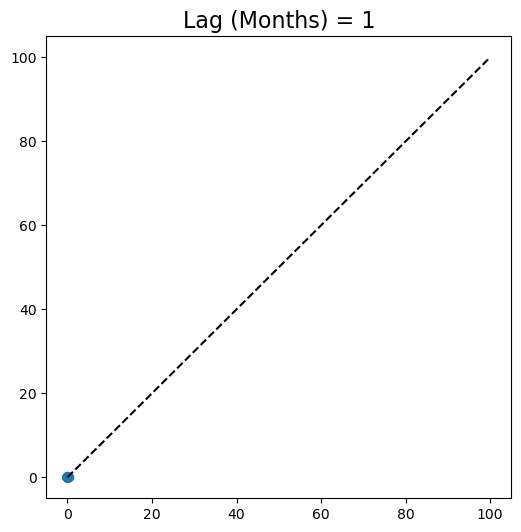

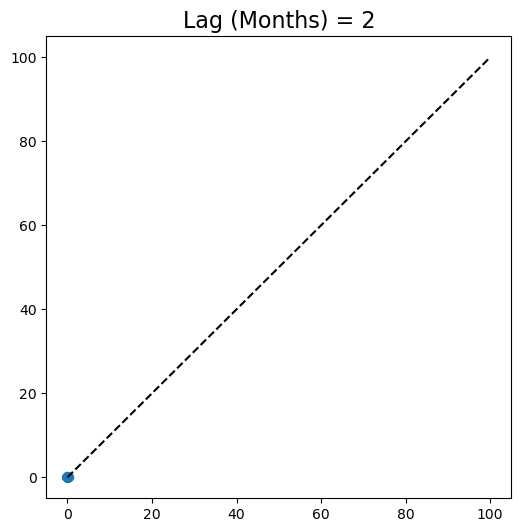

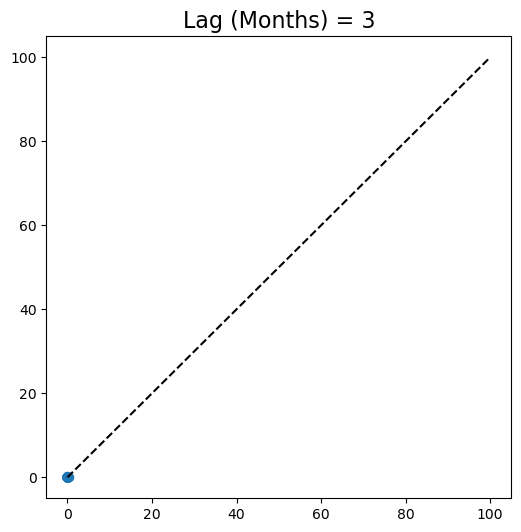

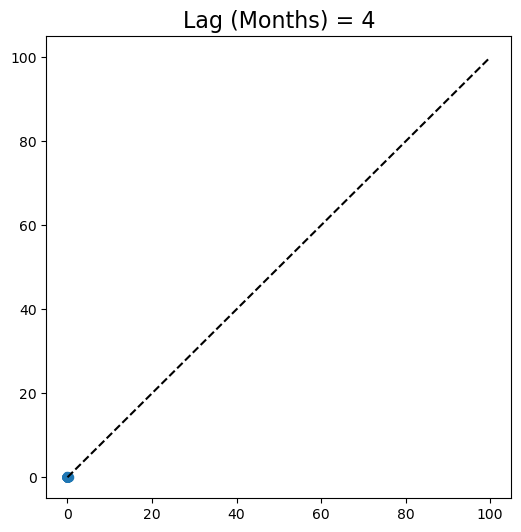

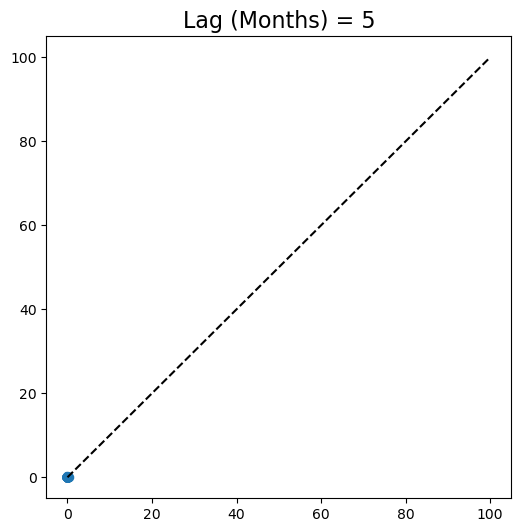

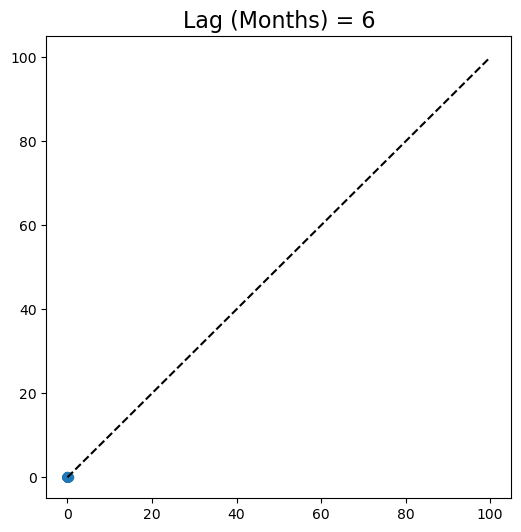

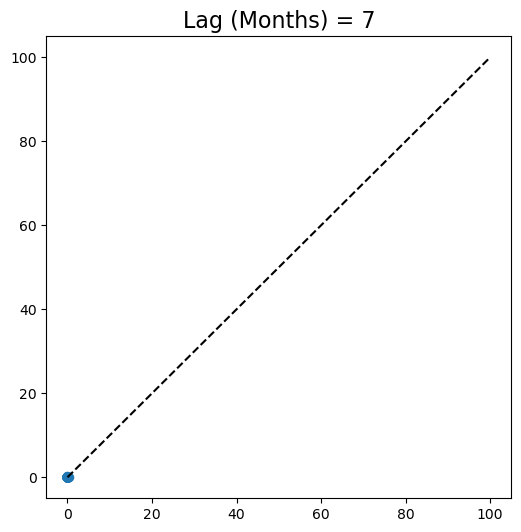

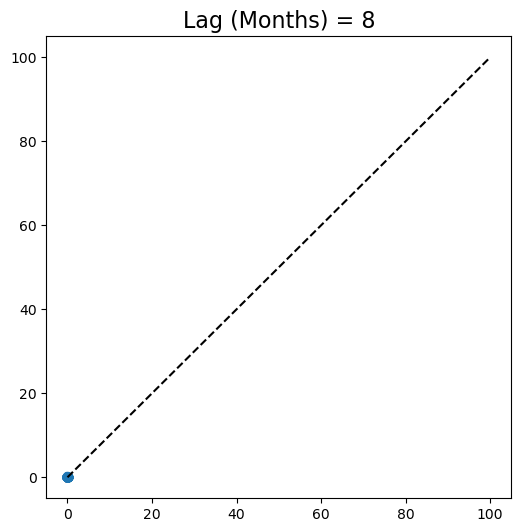

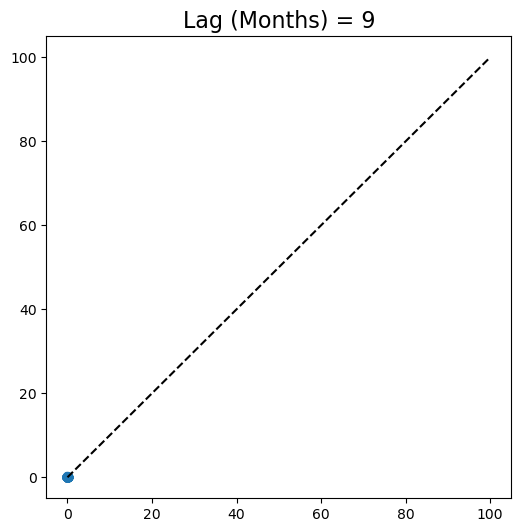

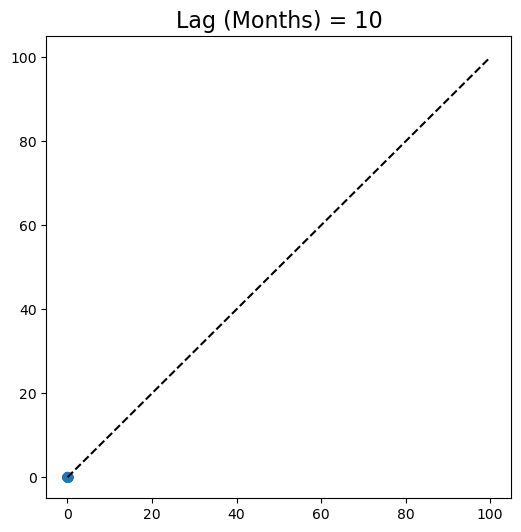

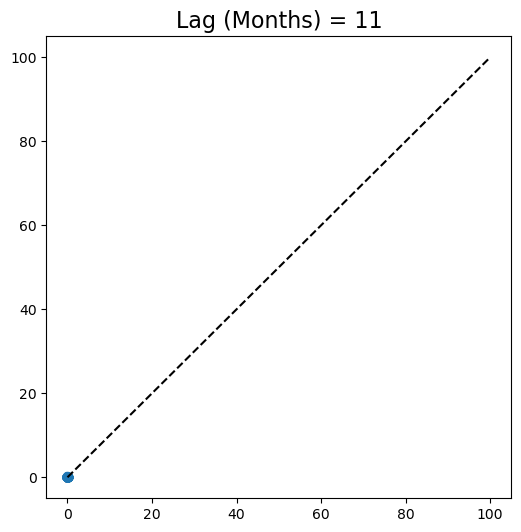

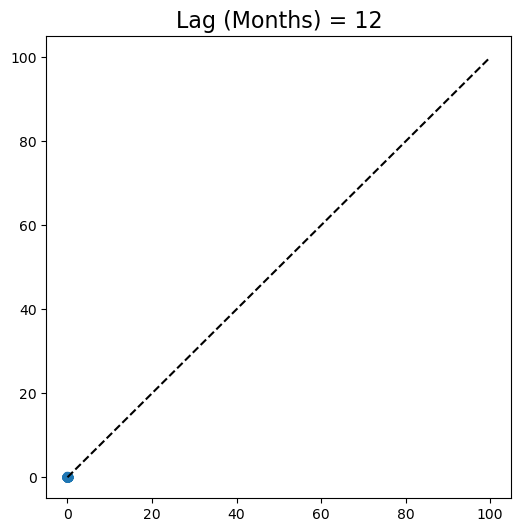

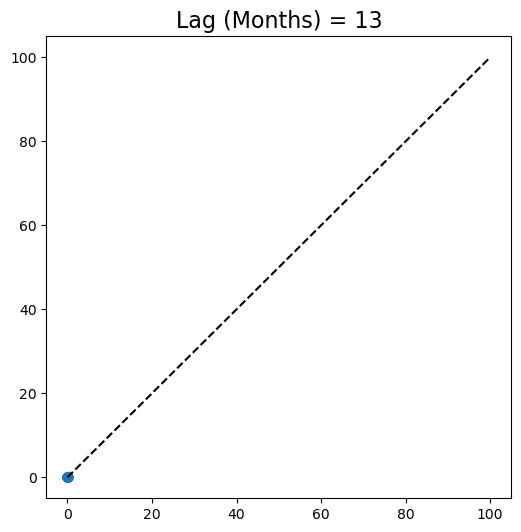

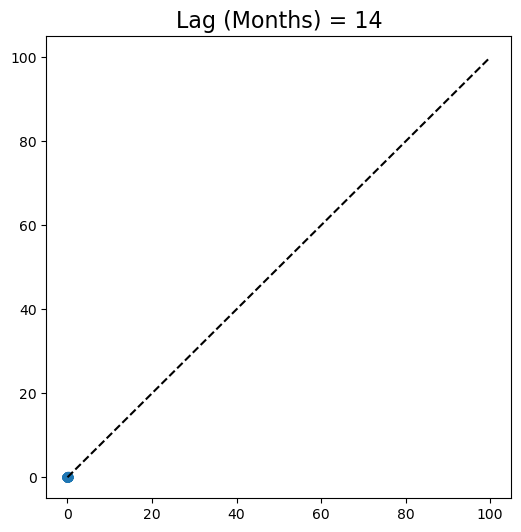

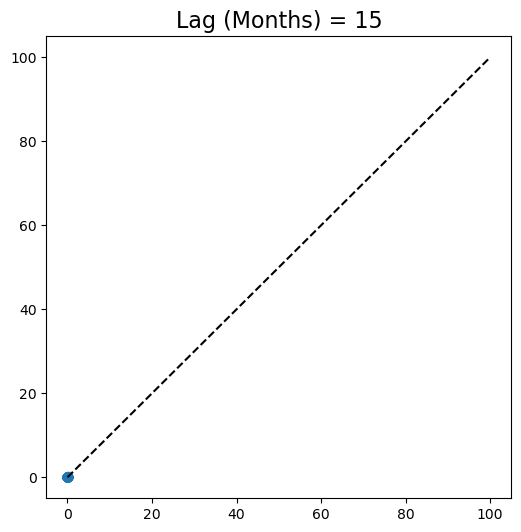

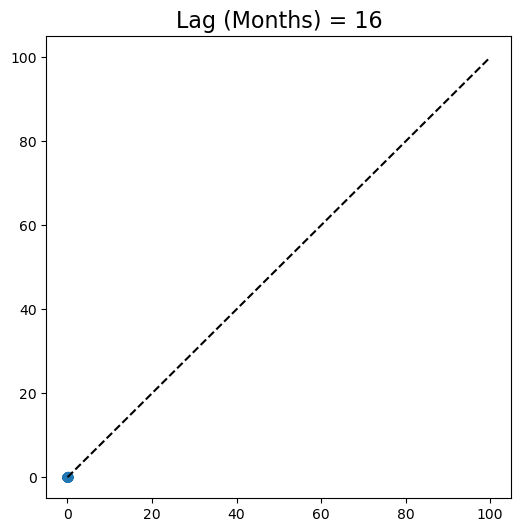

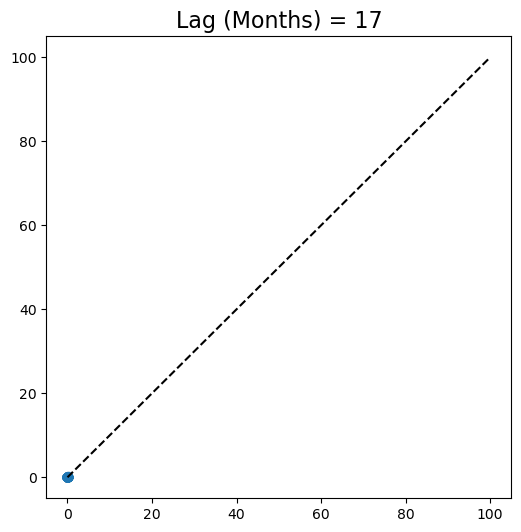

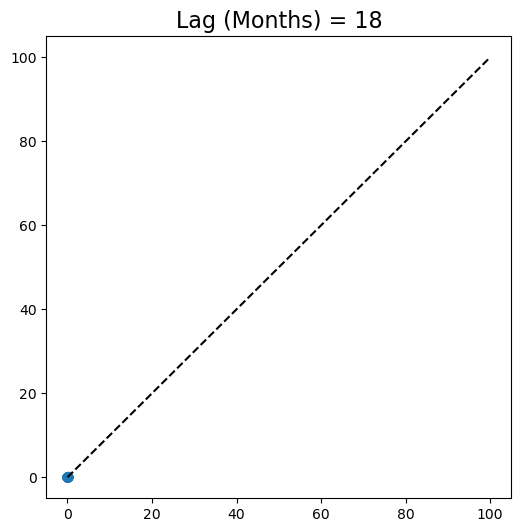

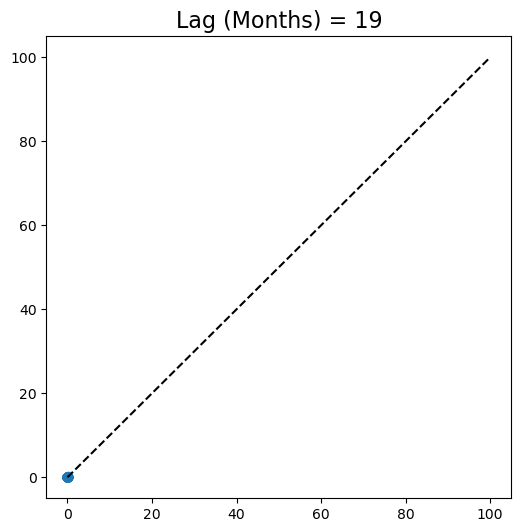

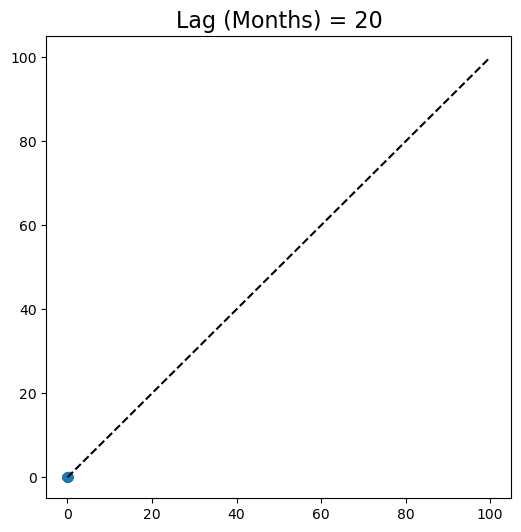

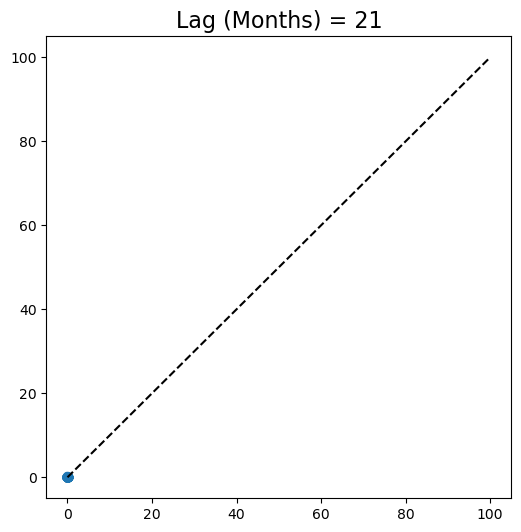

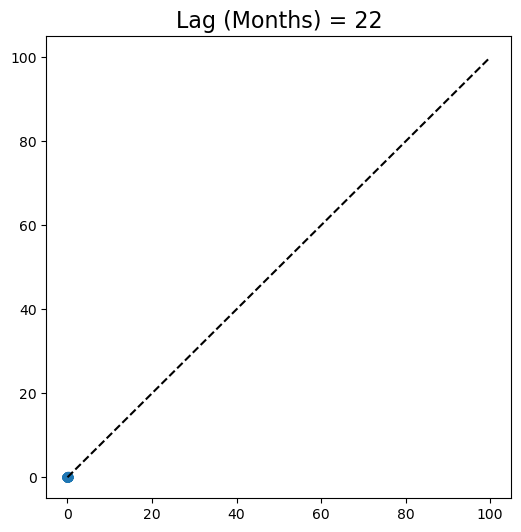

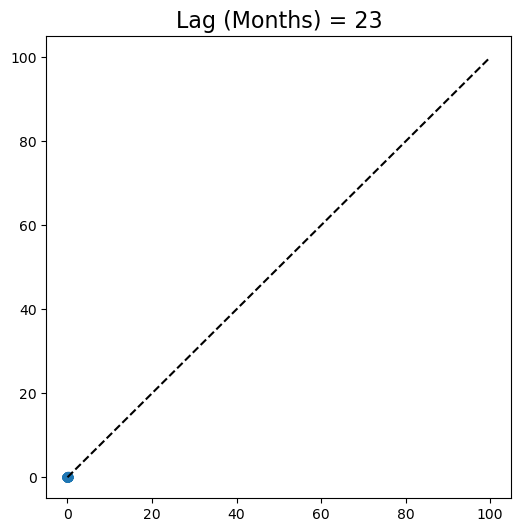

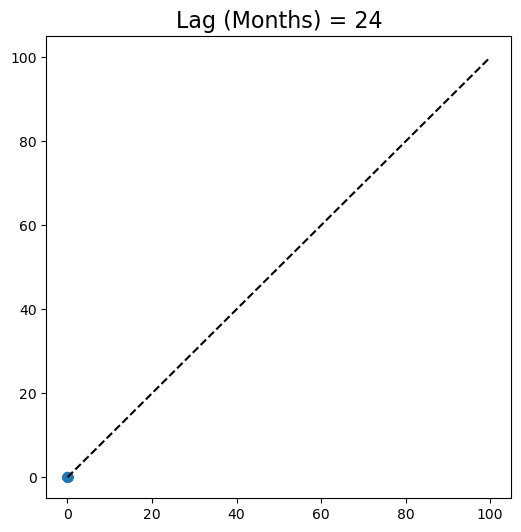

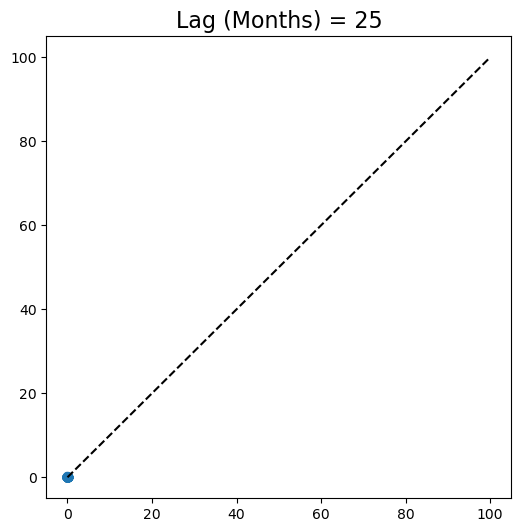

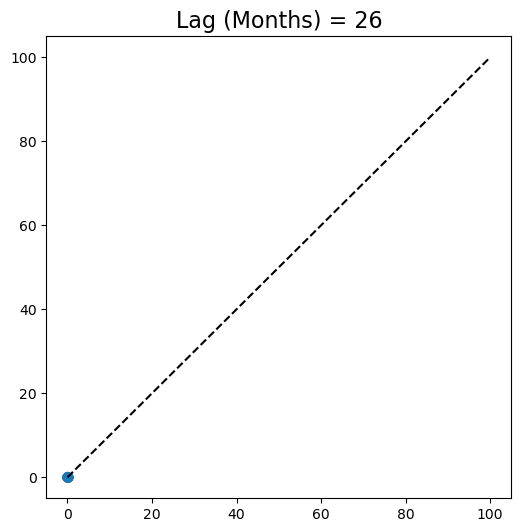

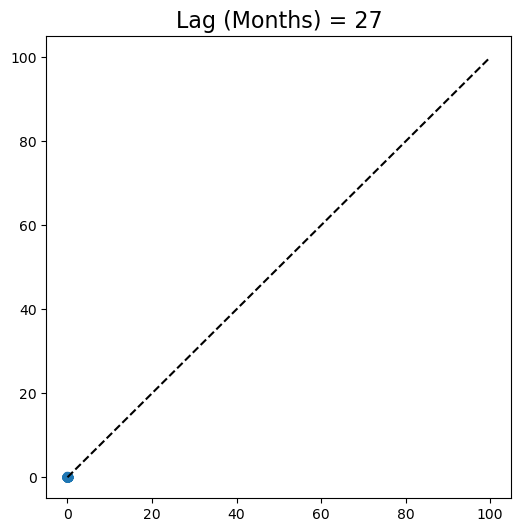

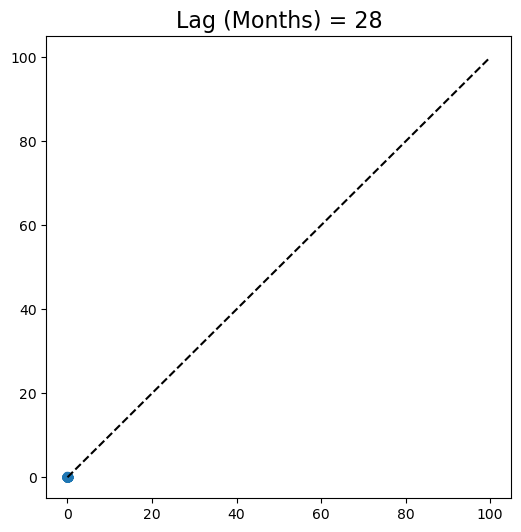

In [16]:
corr_coefs = []

for lag in range(1,29,1): #data is divided into months
    corr_coefs.append(lagcorr(ab2, lag))

In [17]:
#lagcorr(ab2, 1)

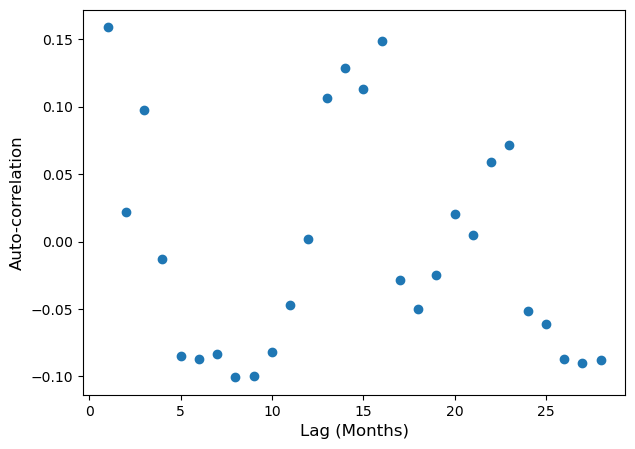

In [18]:
plt.figure(figsize=(7,5))

plt.scatter(range(1,29,1), corr_coefs)

plt.xlabel("Lag (Months)", fontsize=12)
plt.ylabel("Auto-correlation", fontsize=12)

#plt.xticks(range(0,25,3), fontsize=10)
#plt.yticks(fontsize=10)

#plt.ylim([-1.1,1.1])

plt.show()
plt.close()

### From looking at the first set of plots I don't think there is seasonality

## ab3 seasonality

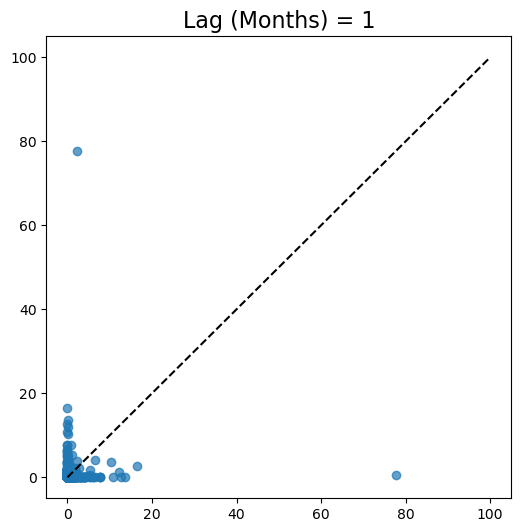

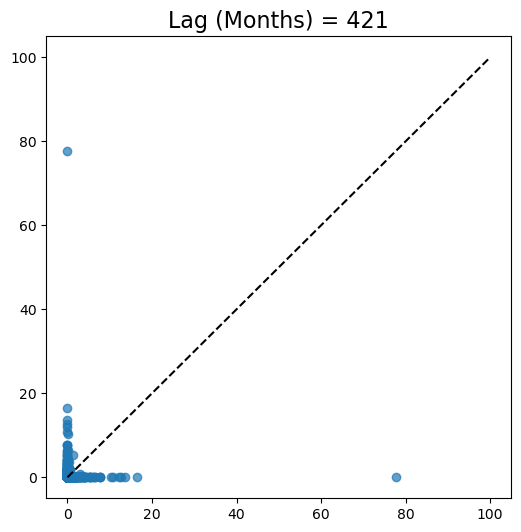

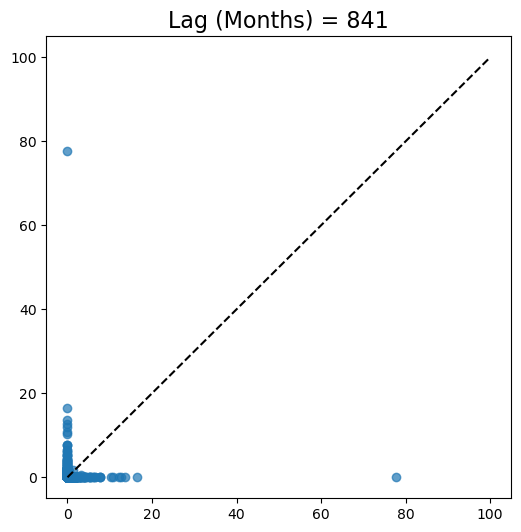

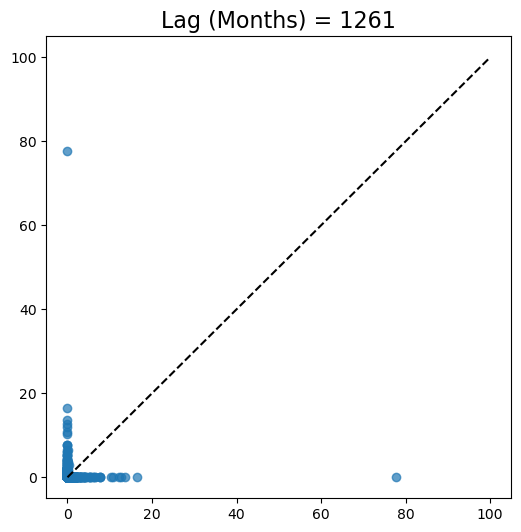

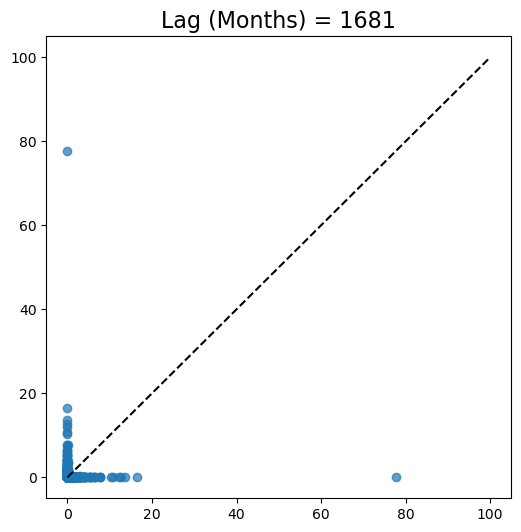

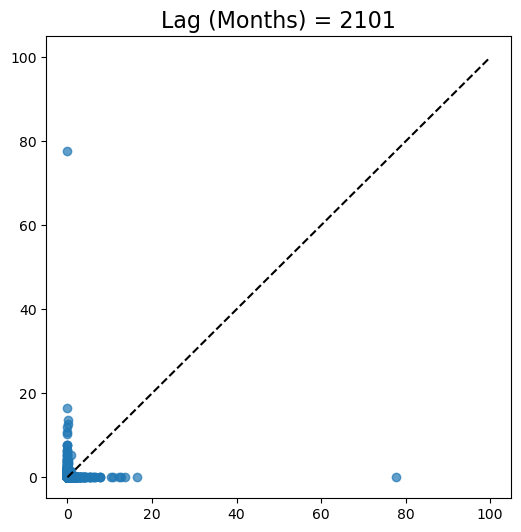

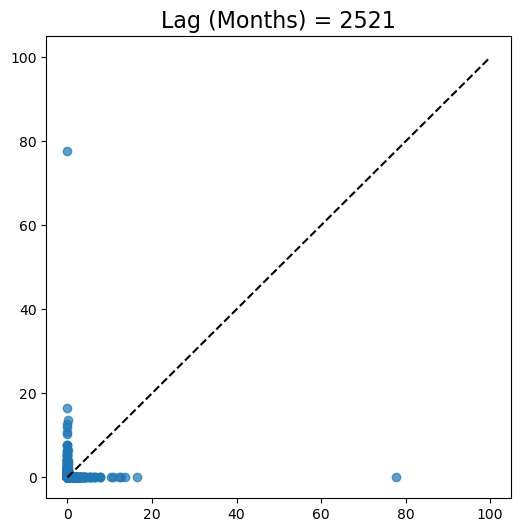

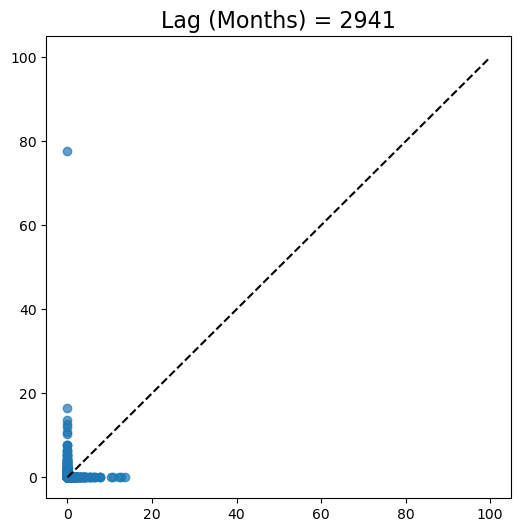

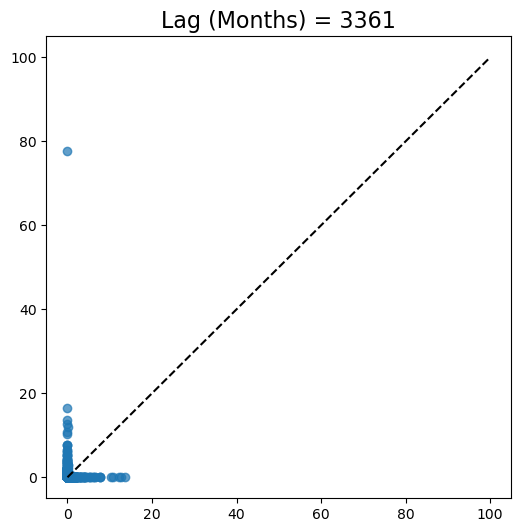

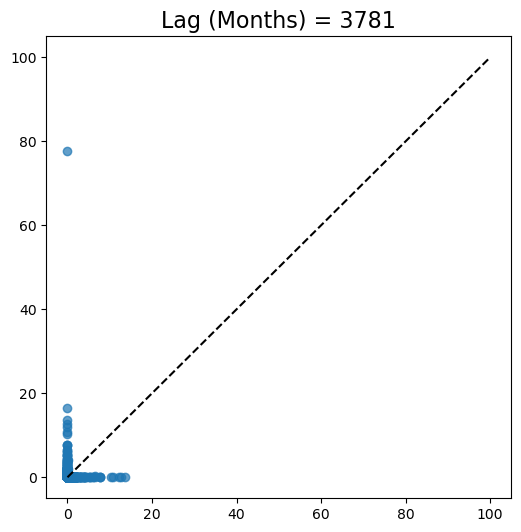

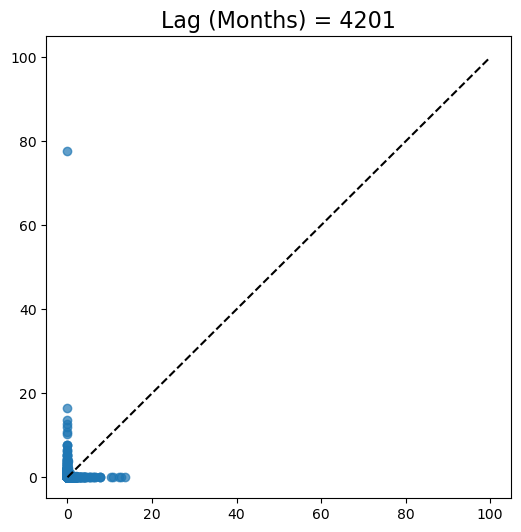

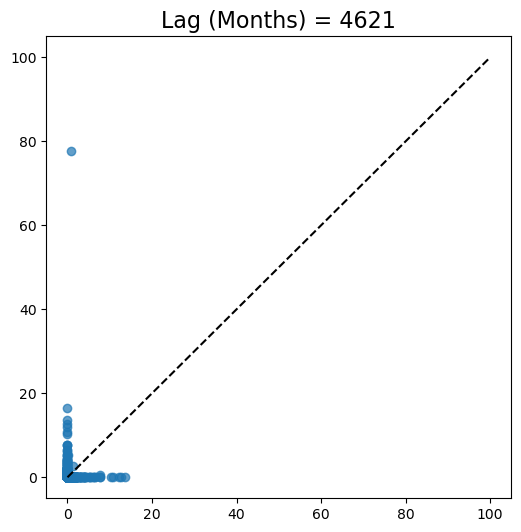

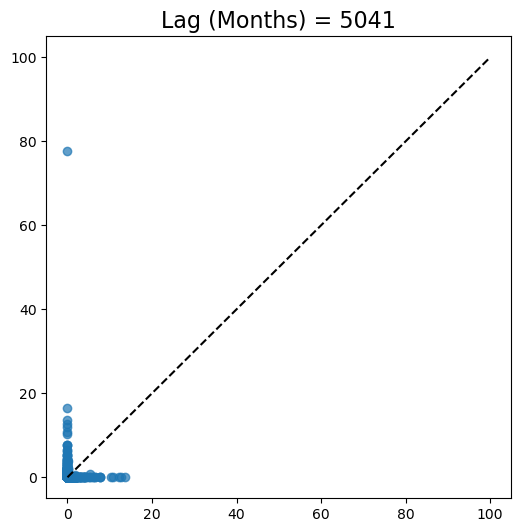

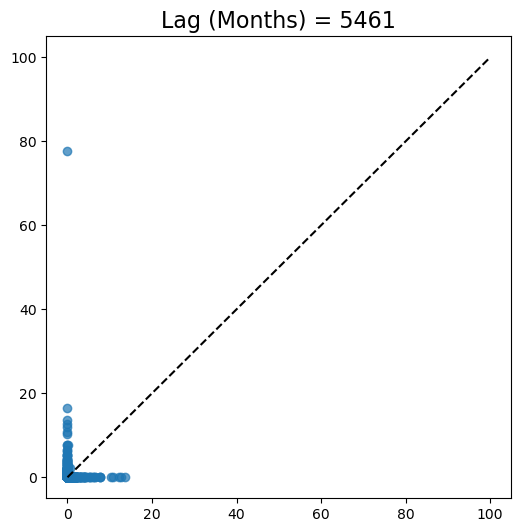

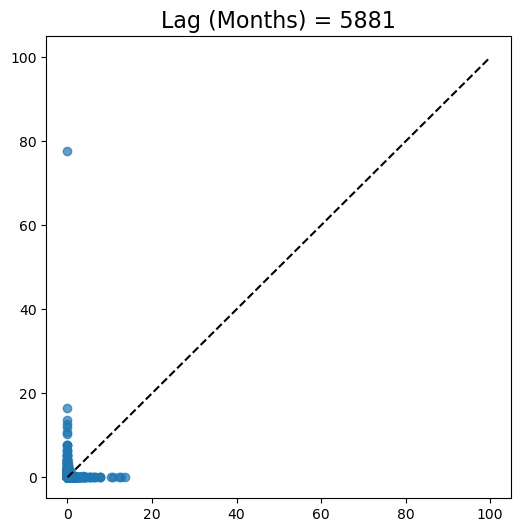

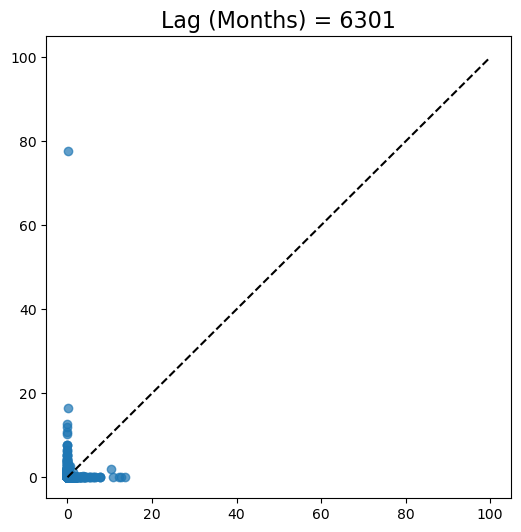

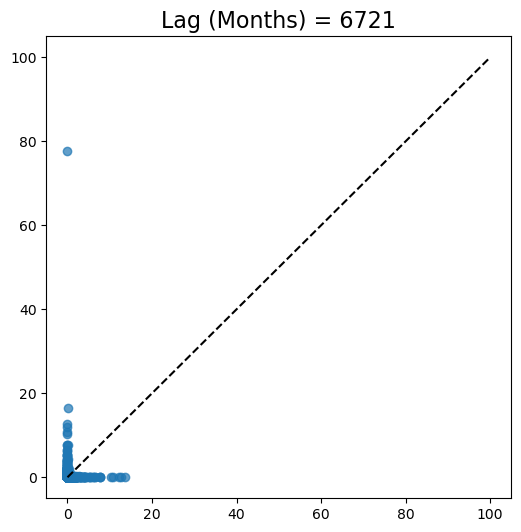

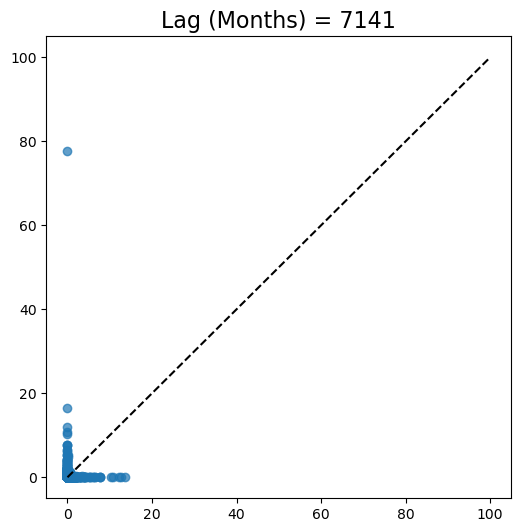

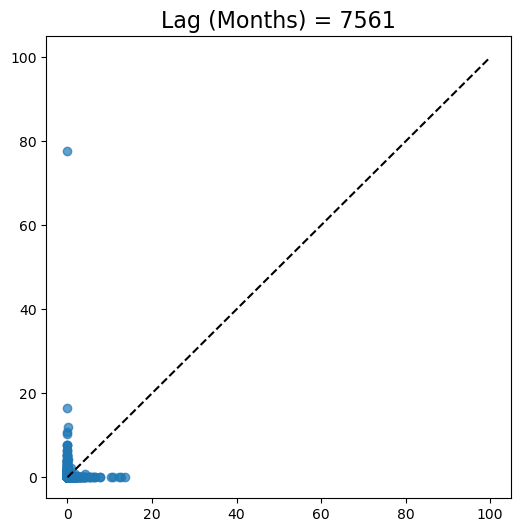

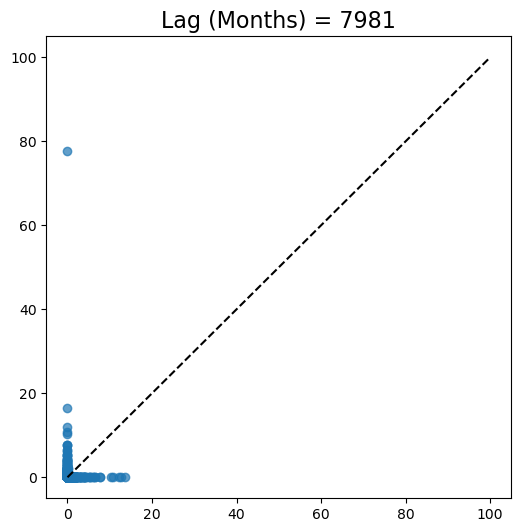

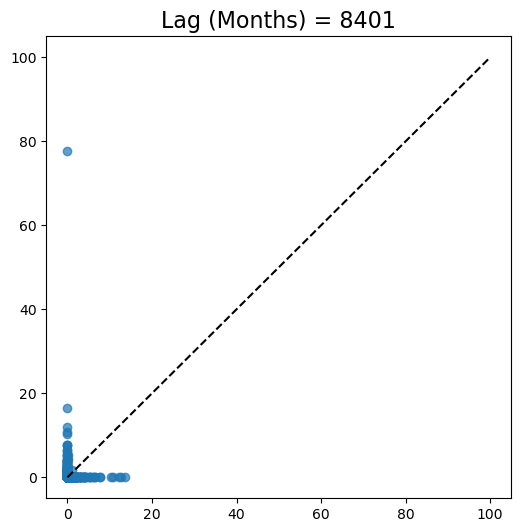

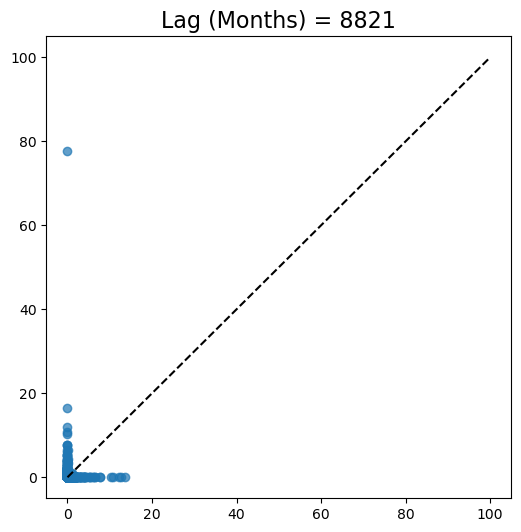

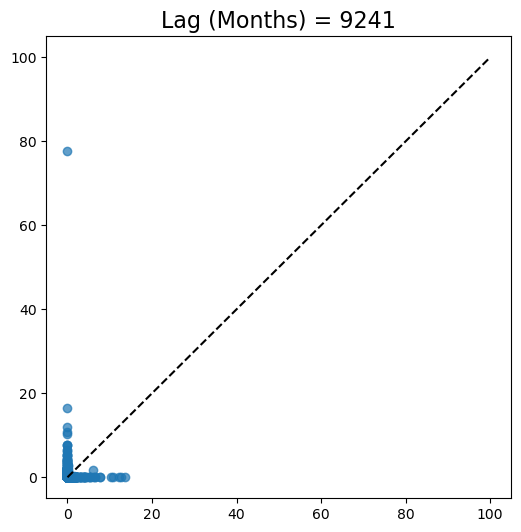

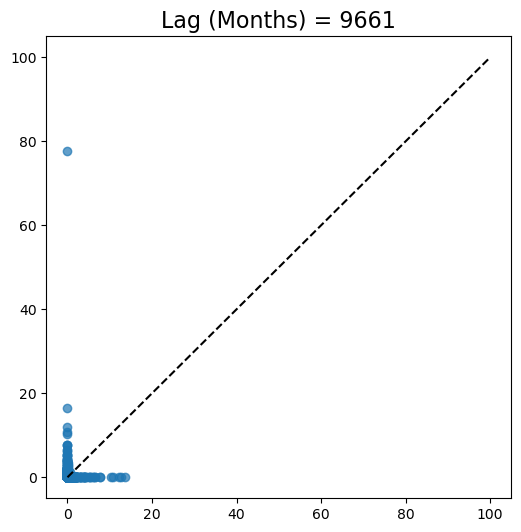

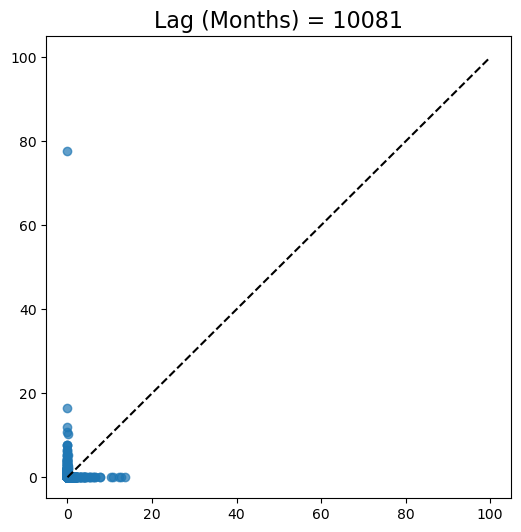

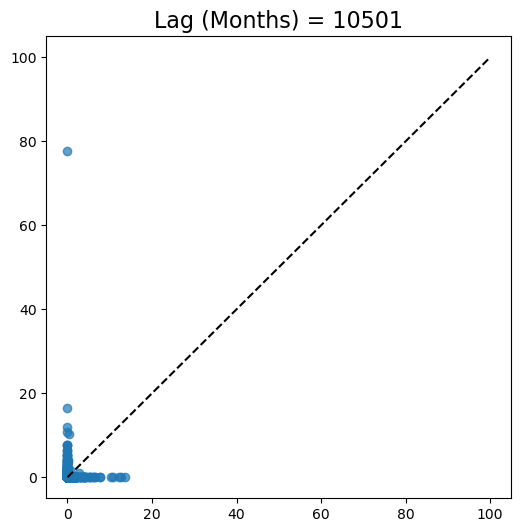

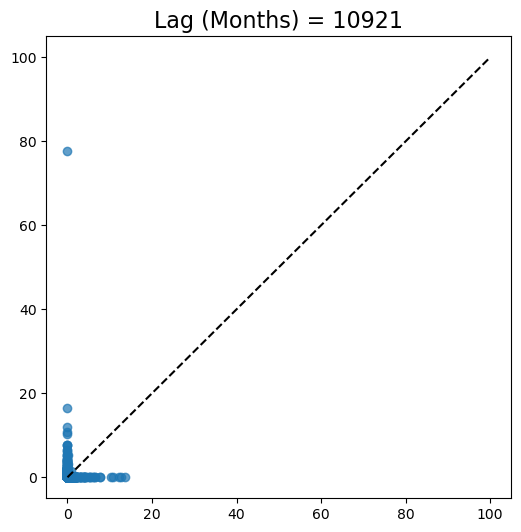

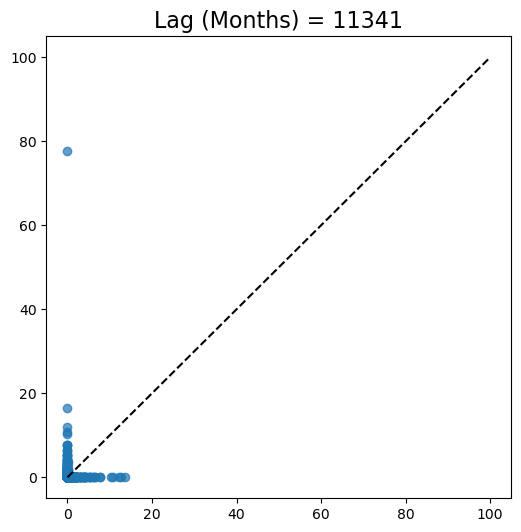

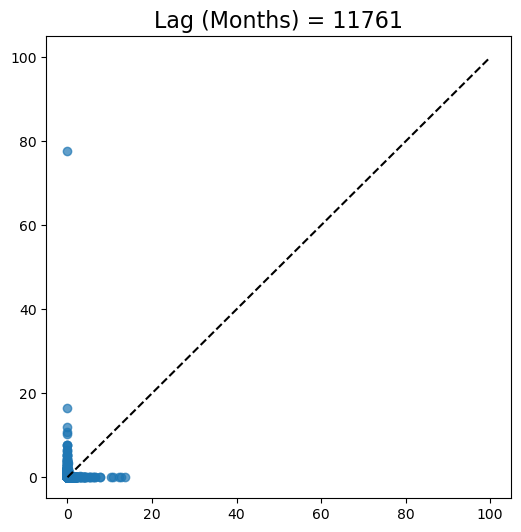

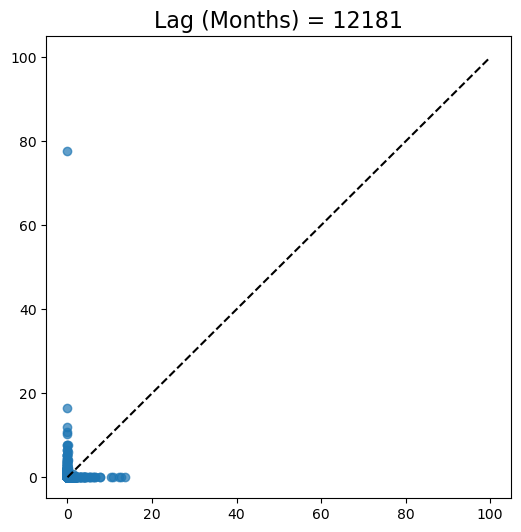

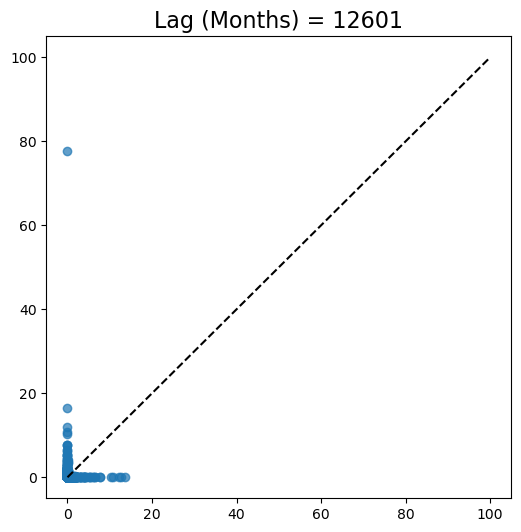

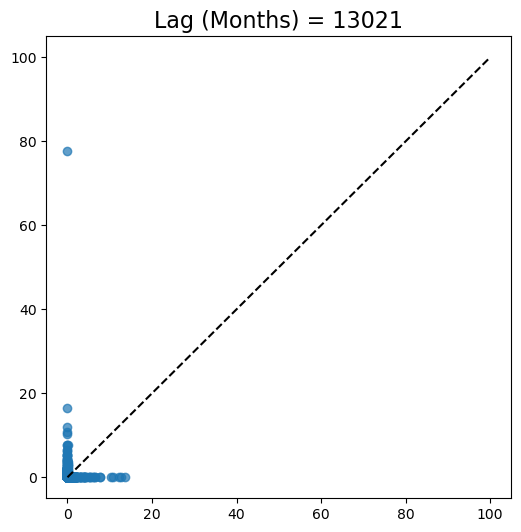

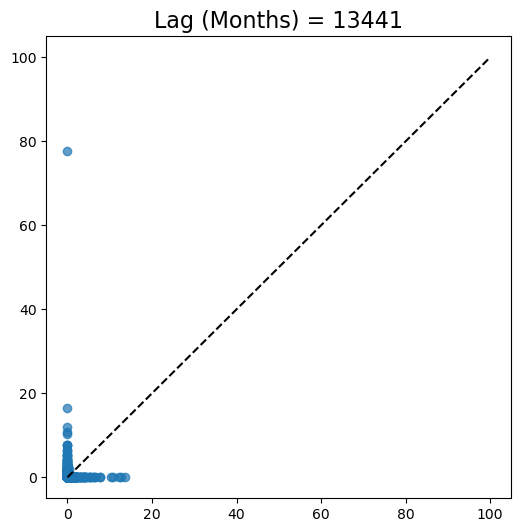

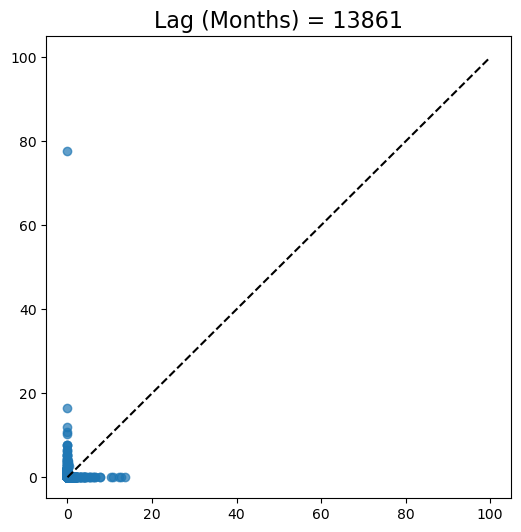

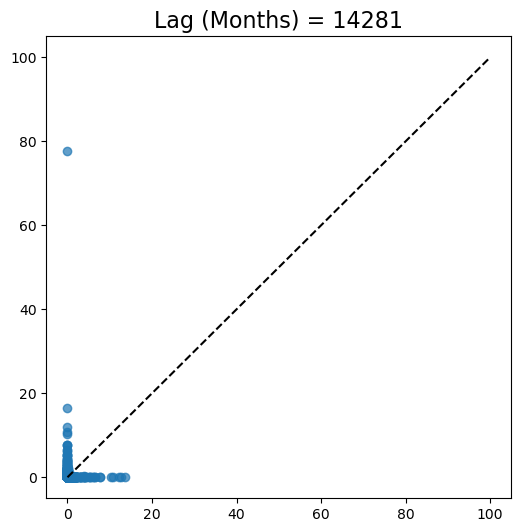

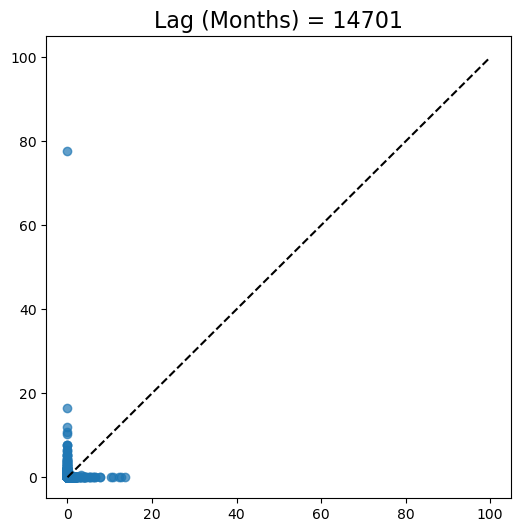

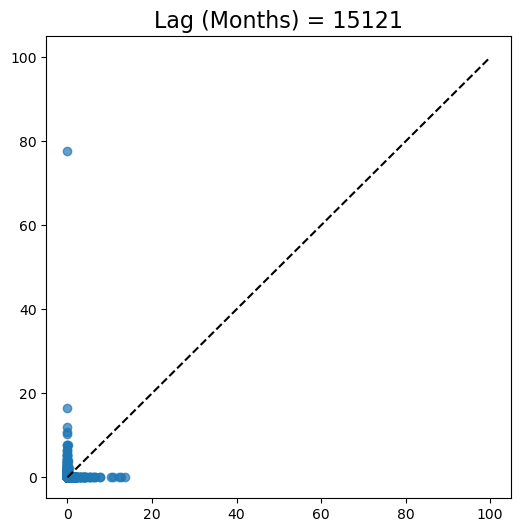

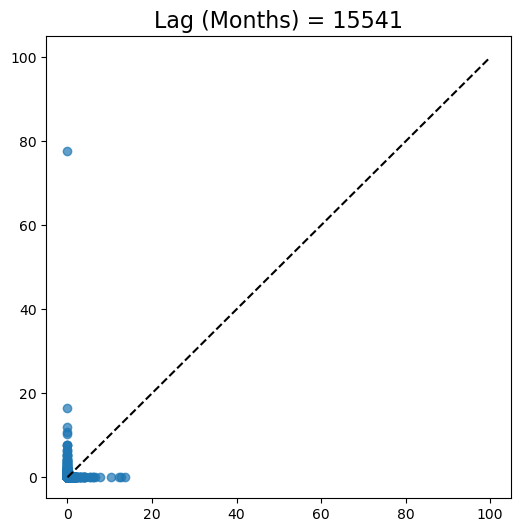

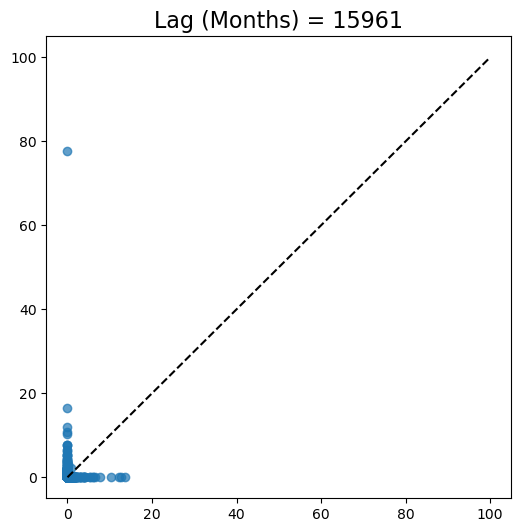

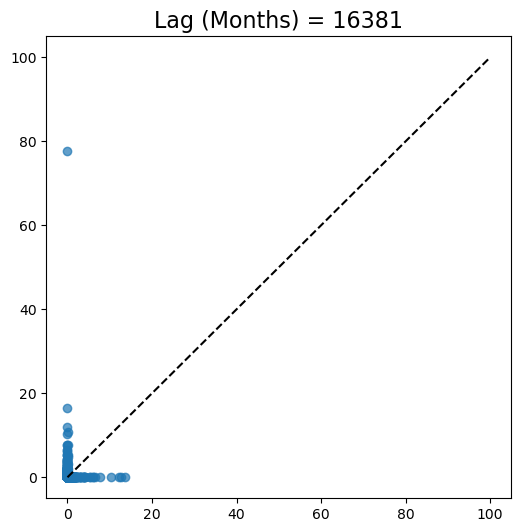

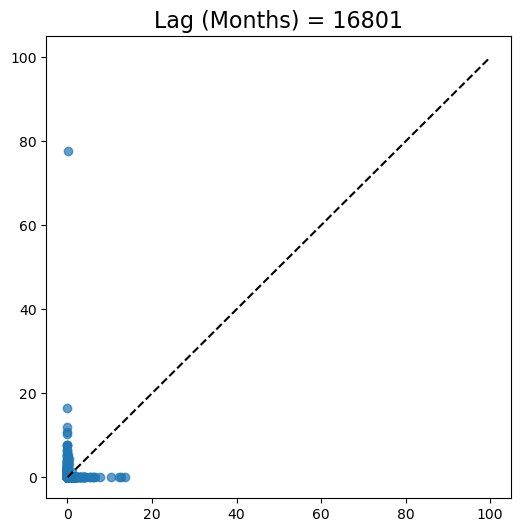

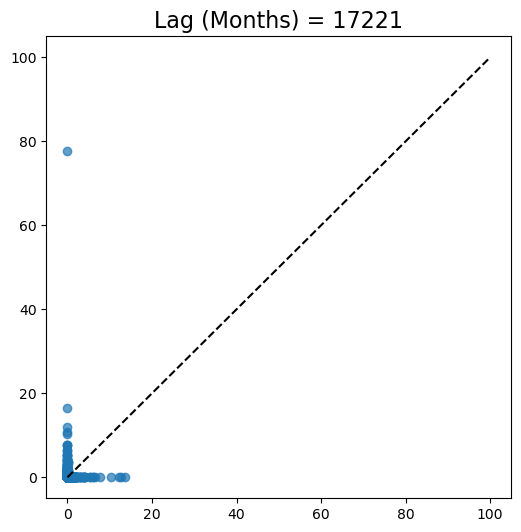

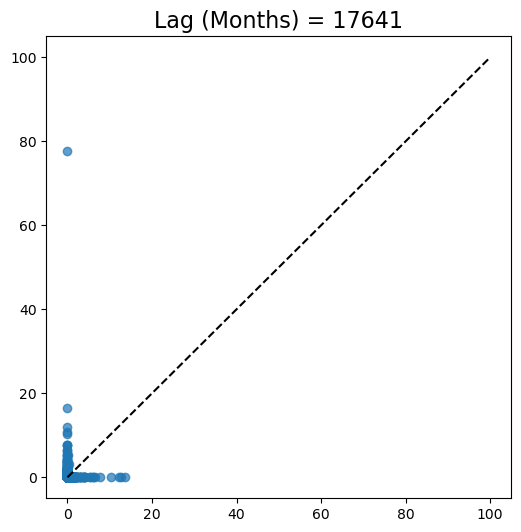

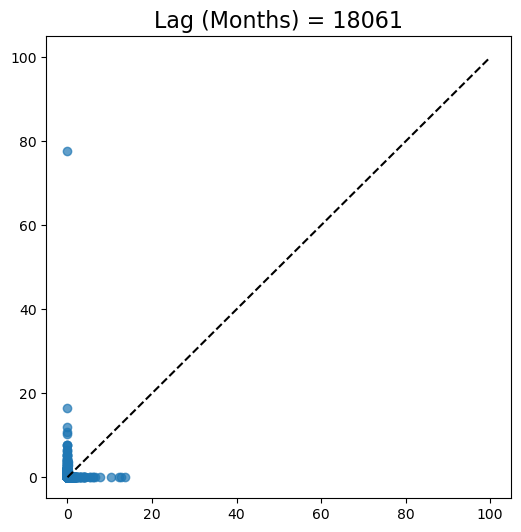

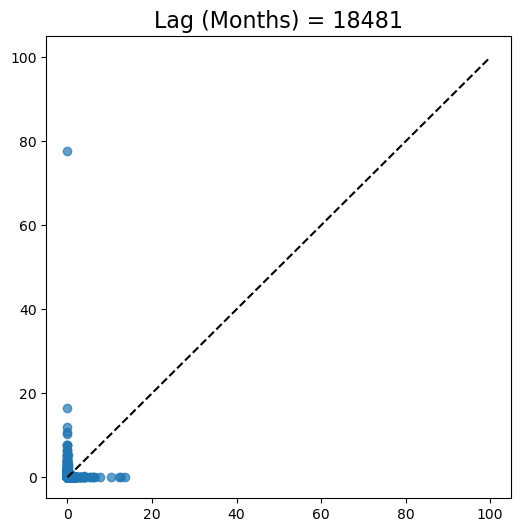

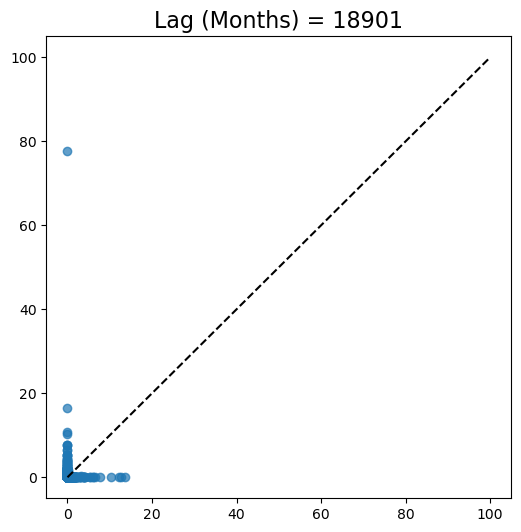

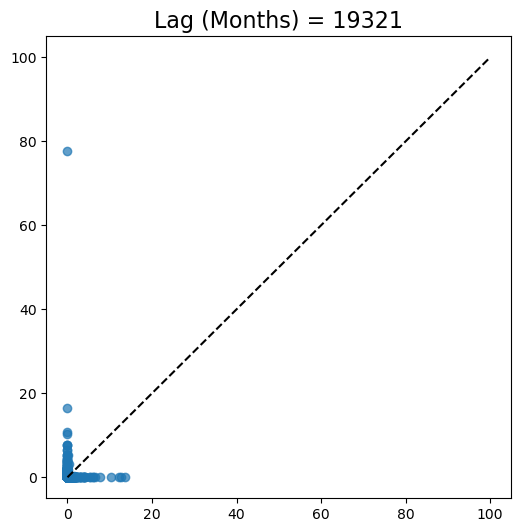

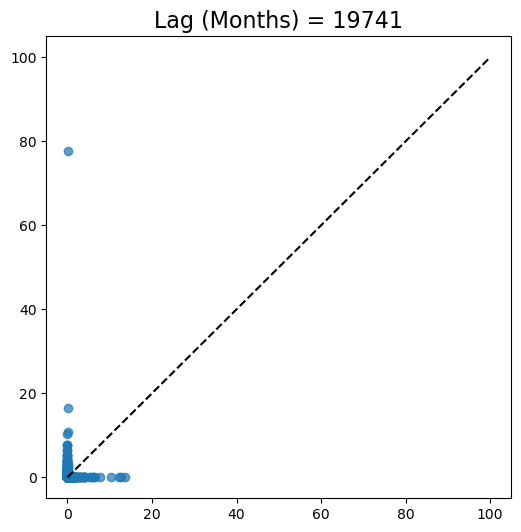

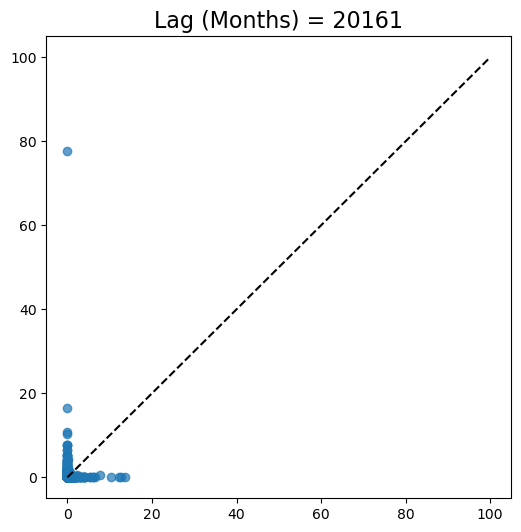

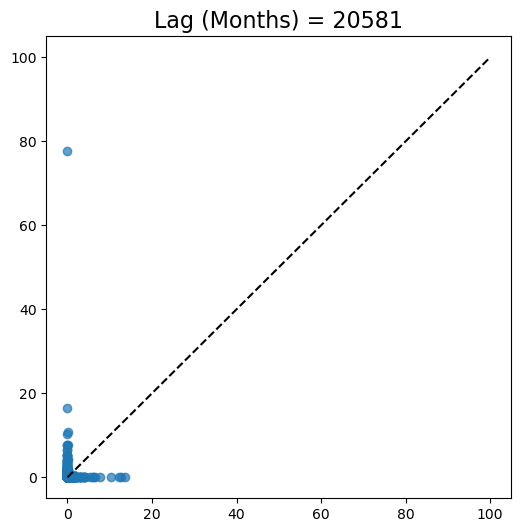

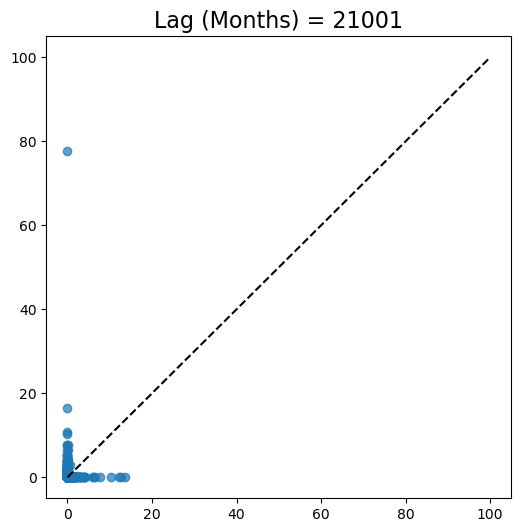

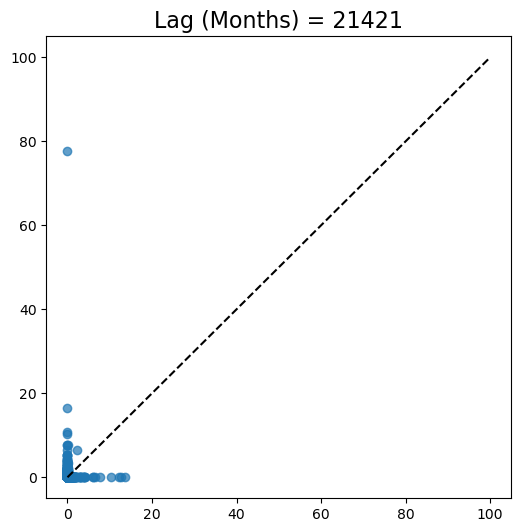

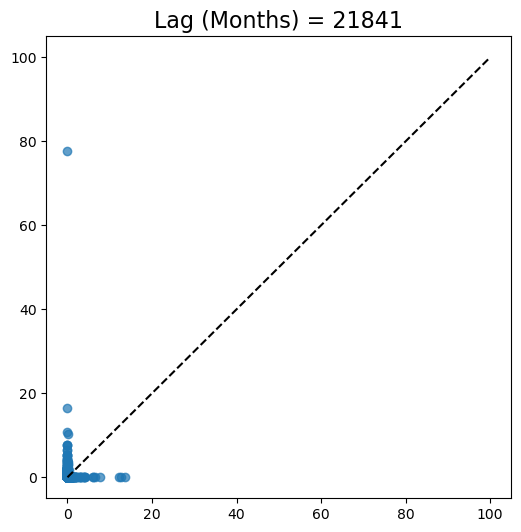

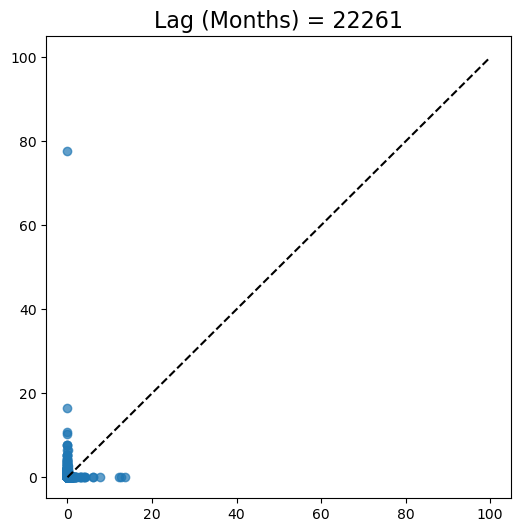

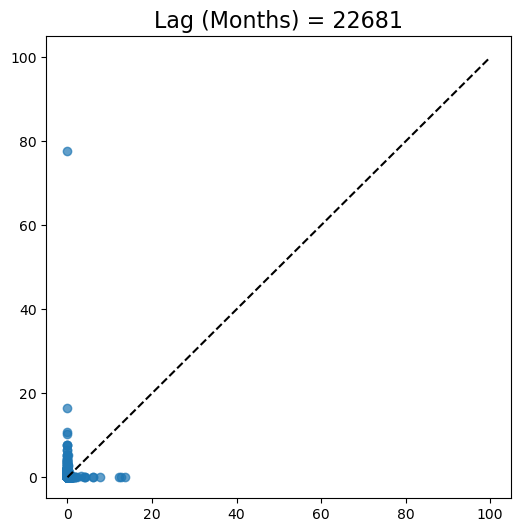

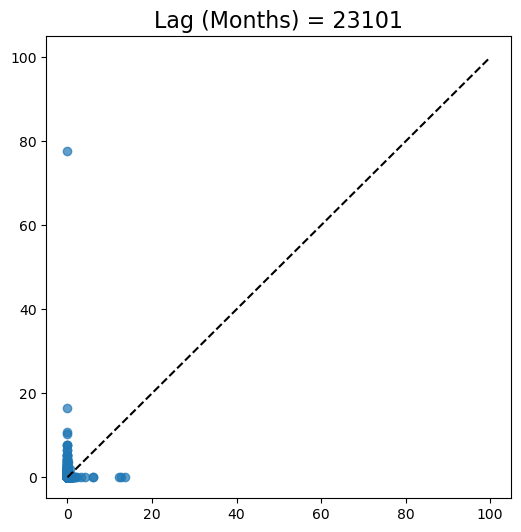

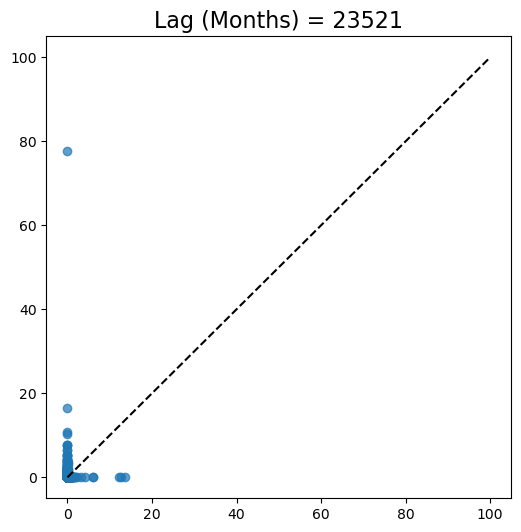

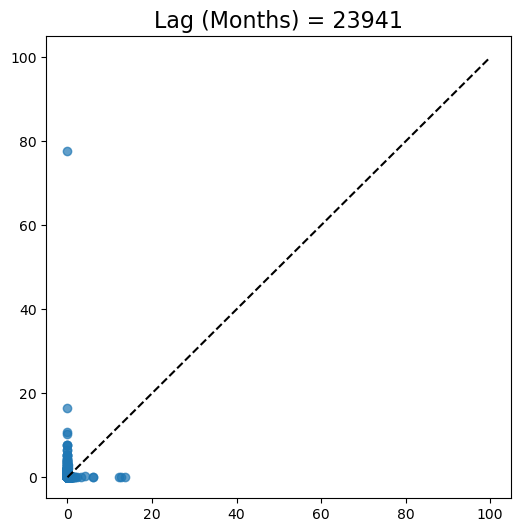

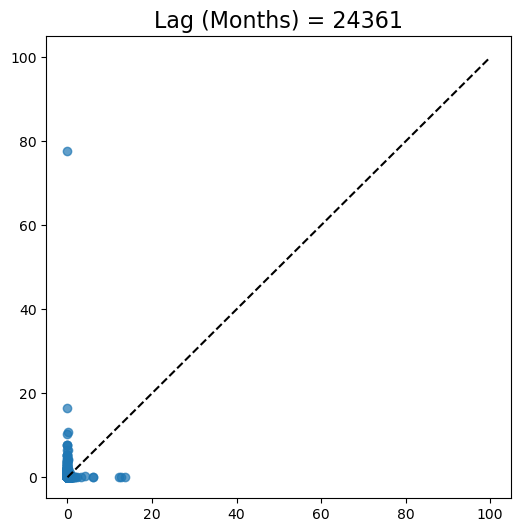

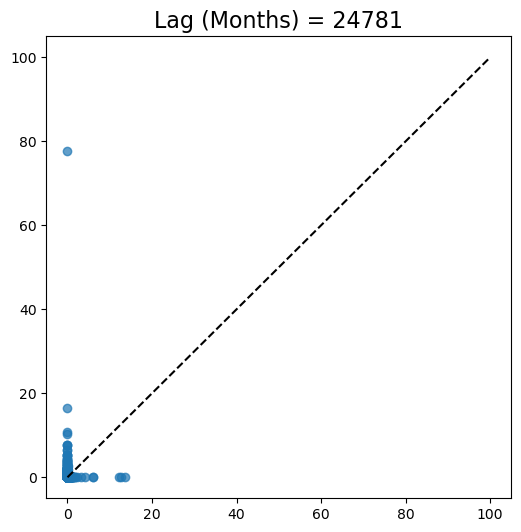

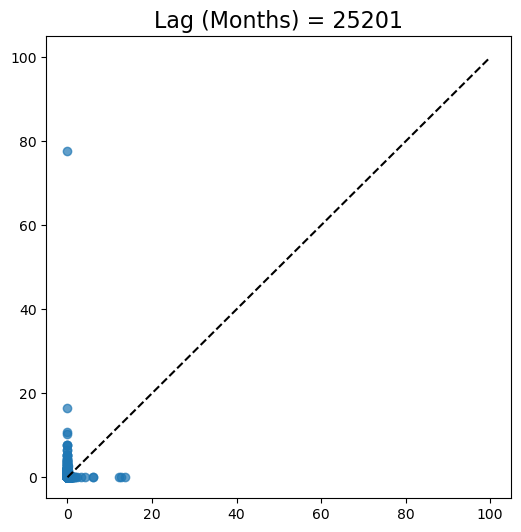

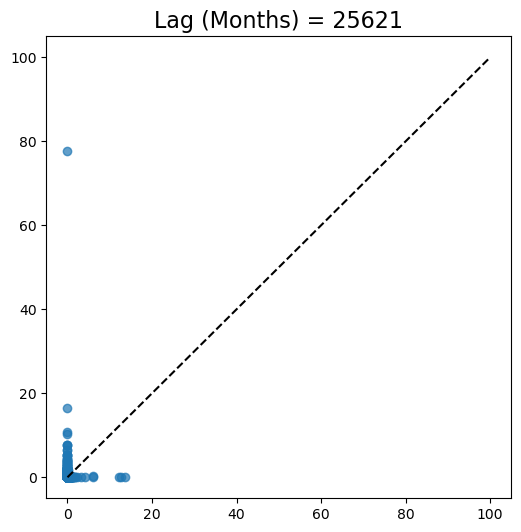

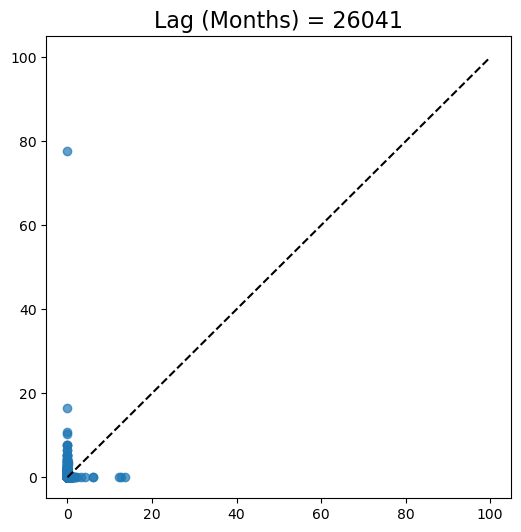

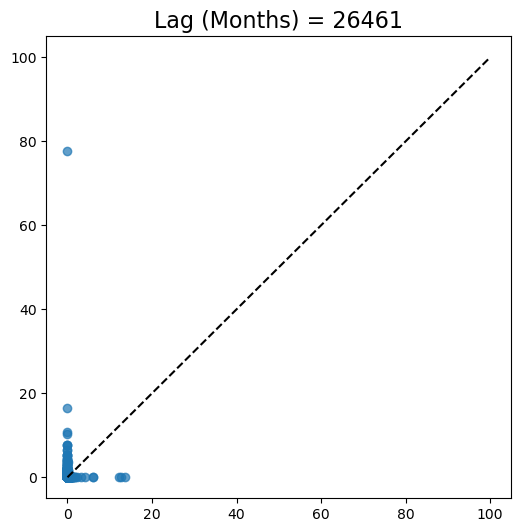

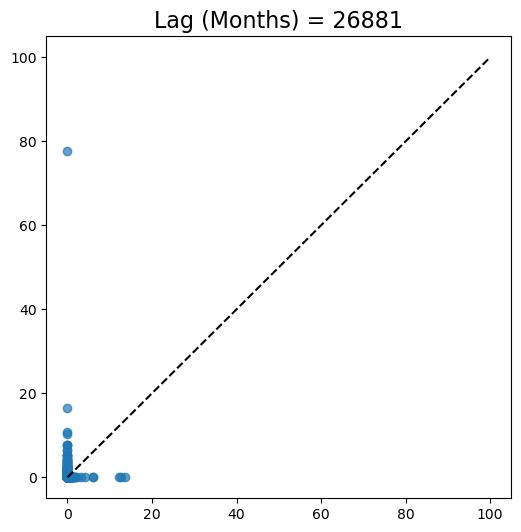

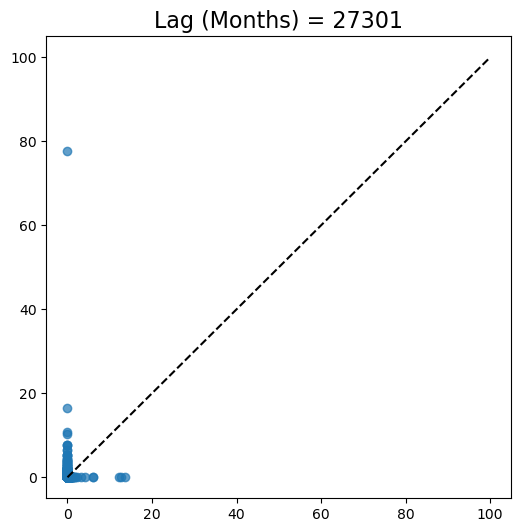

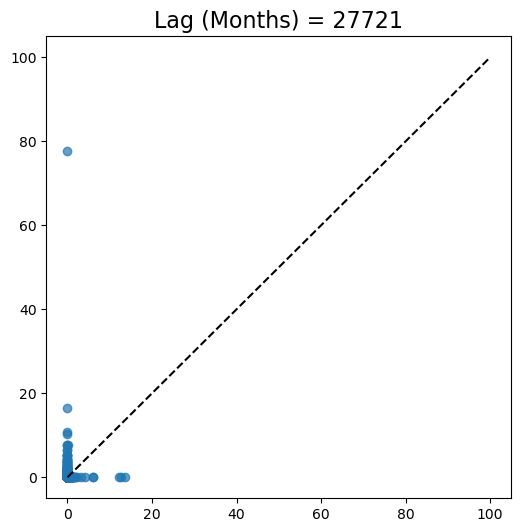

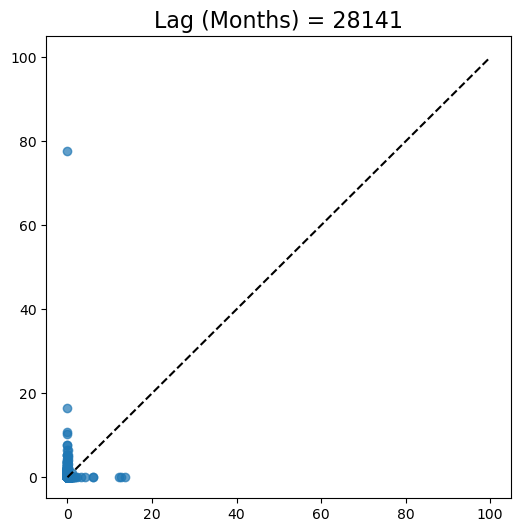

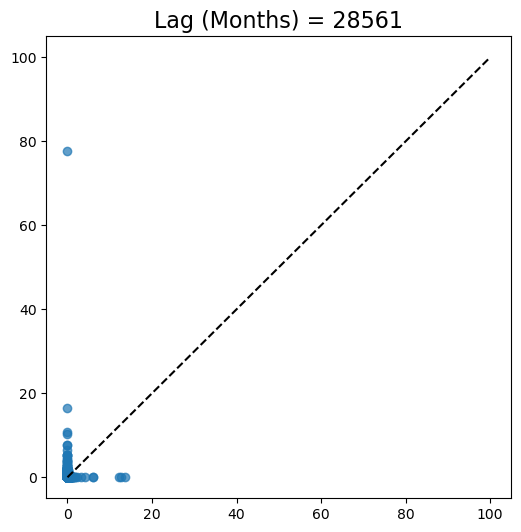

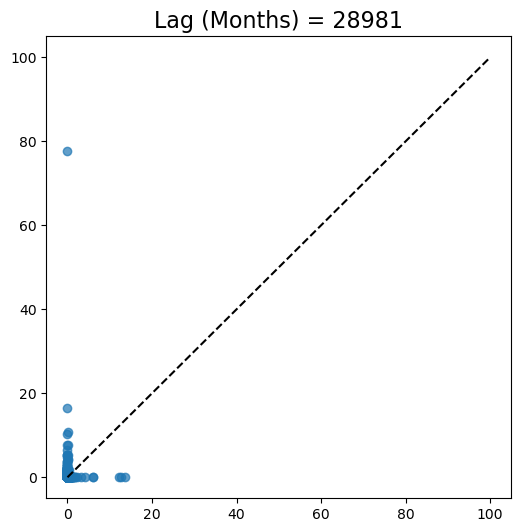

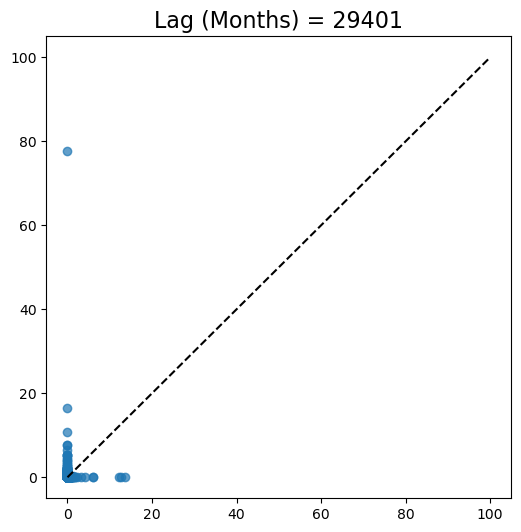

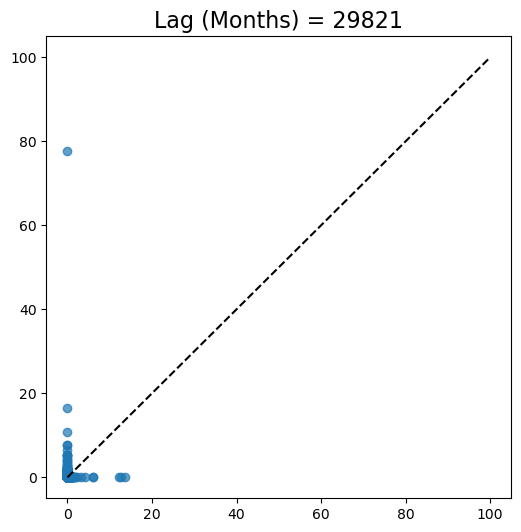

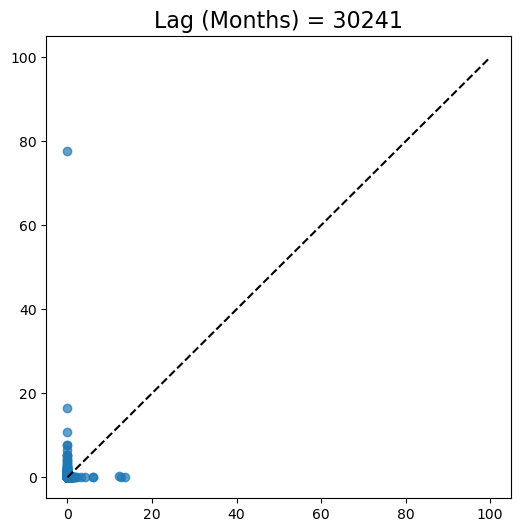

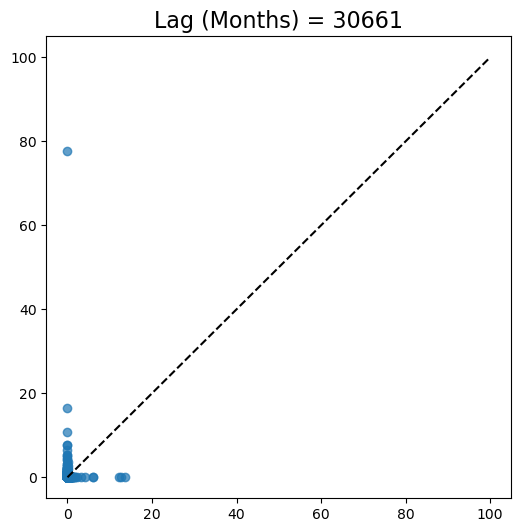

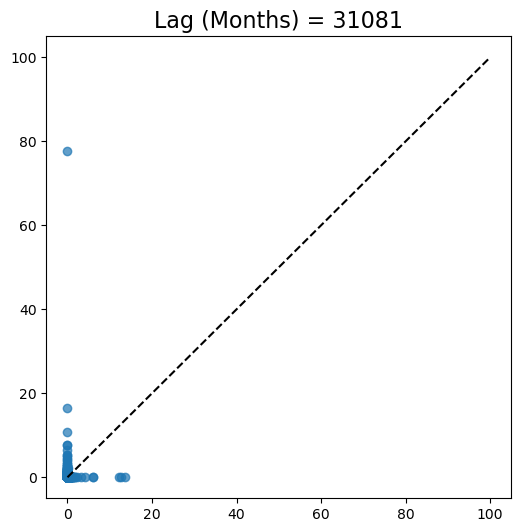

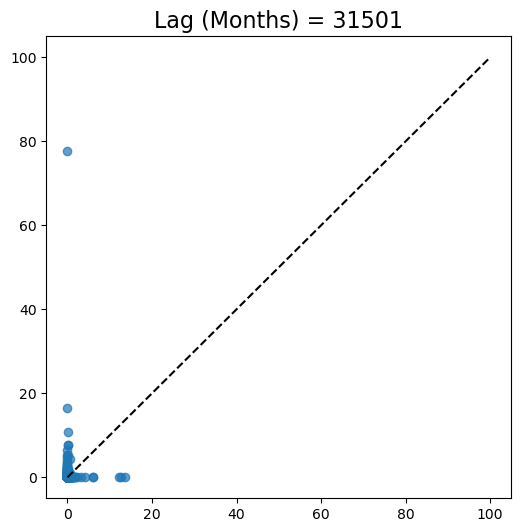

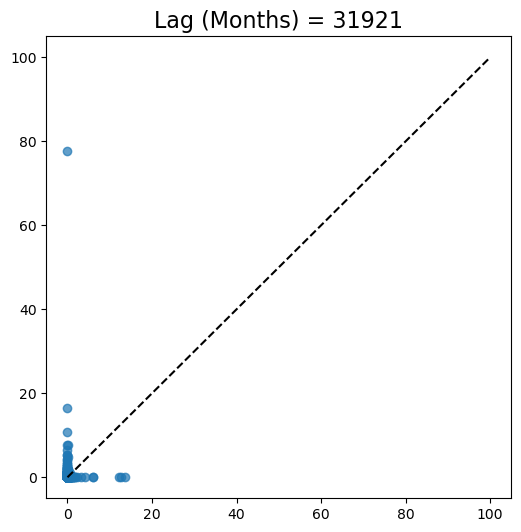

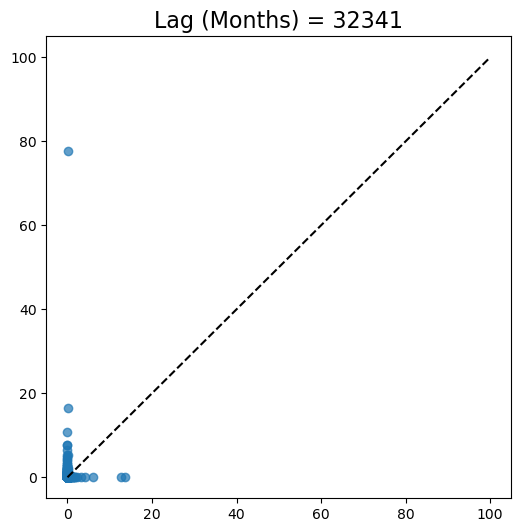

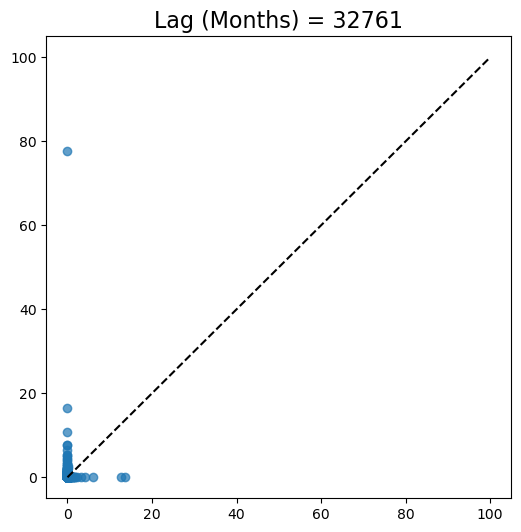

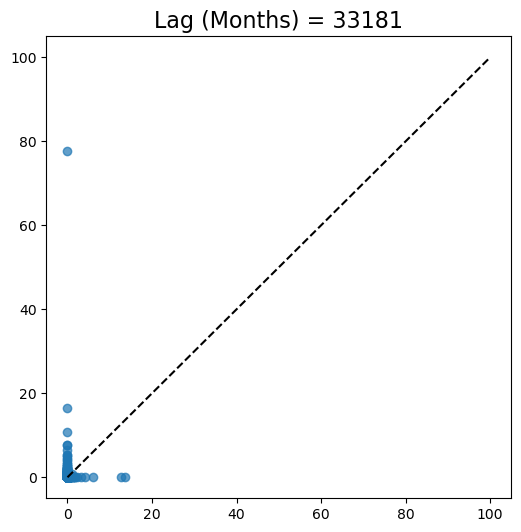

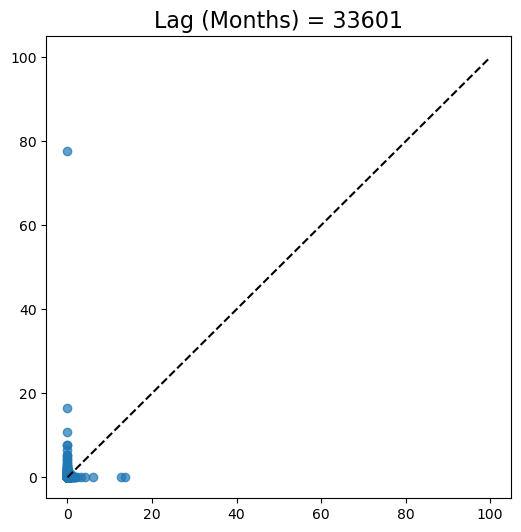

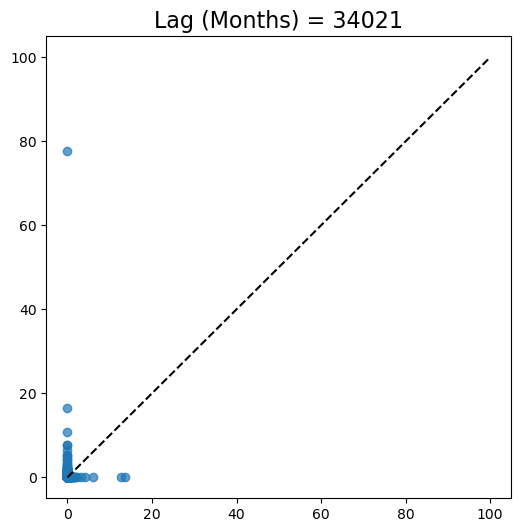

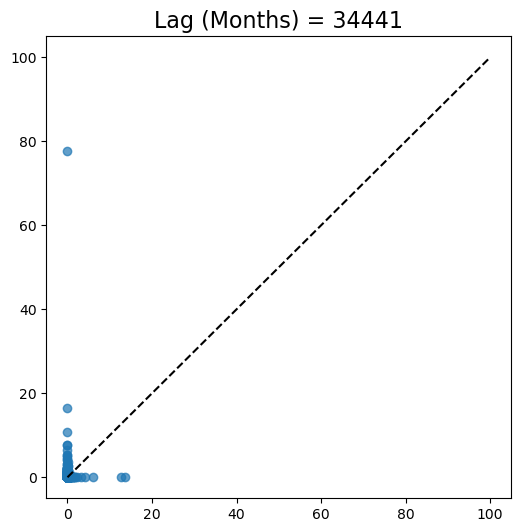

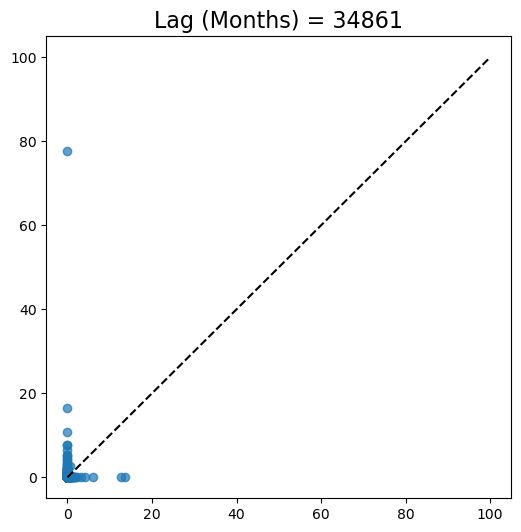

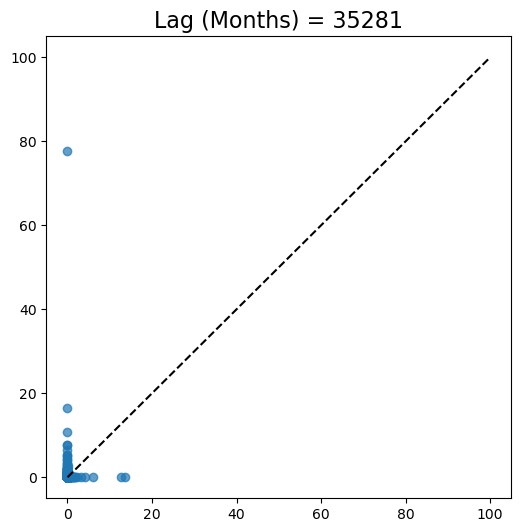

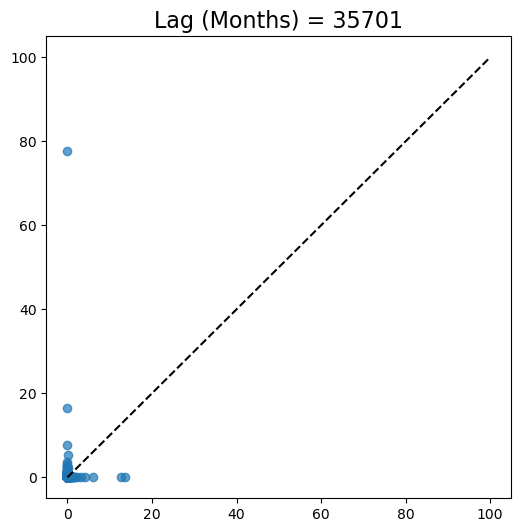

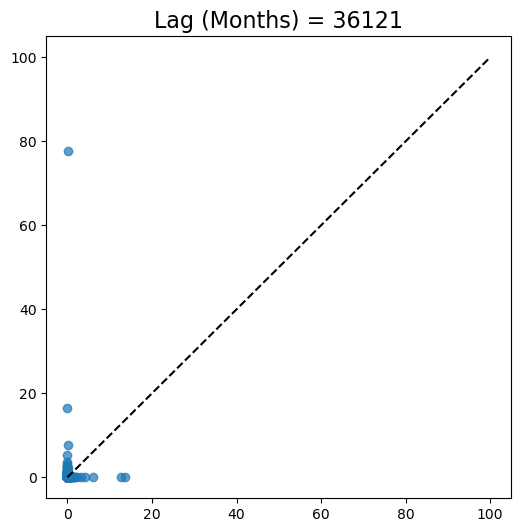

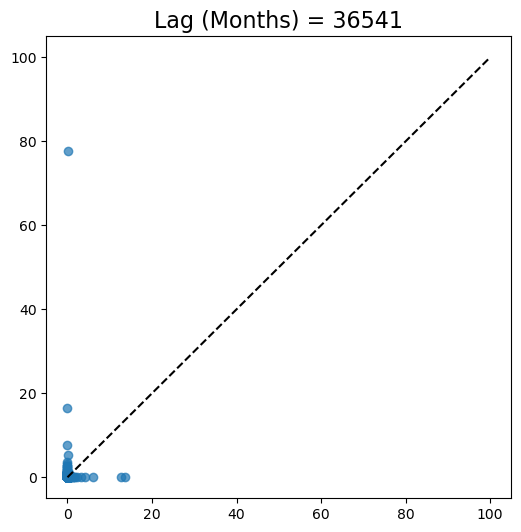

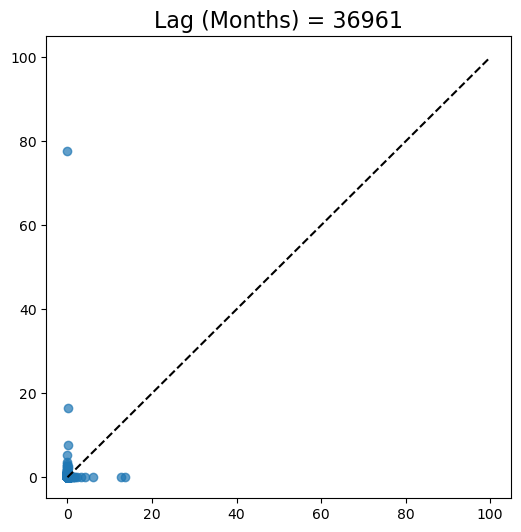

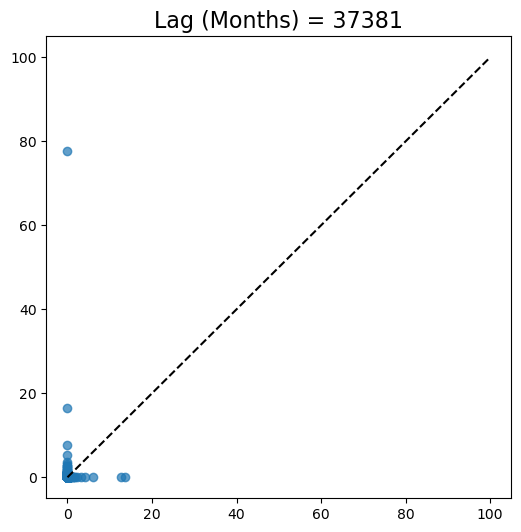

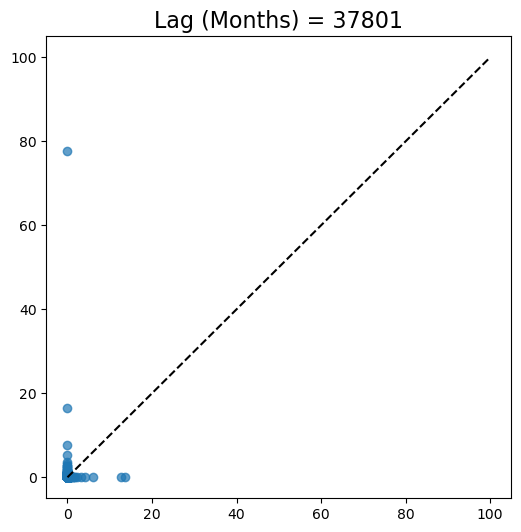

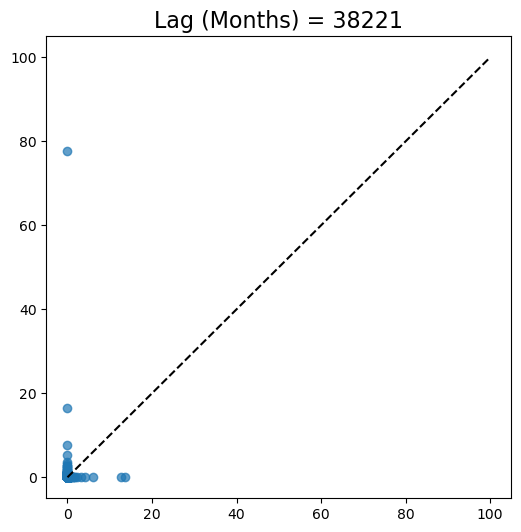

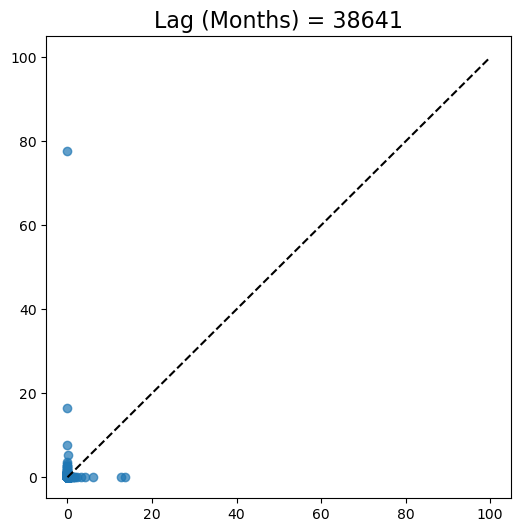

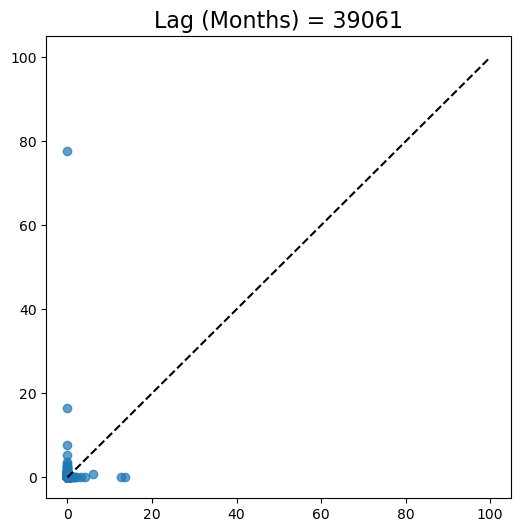

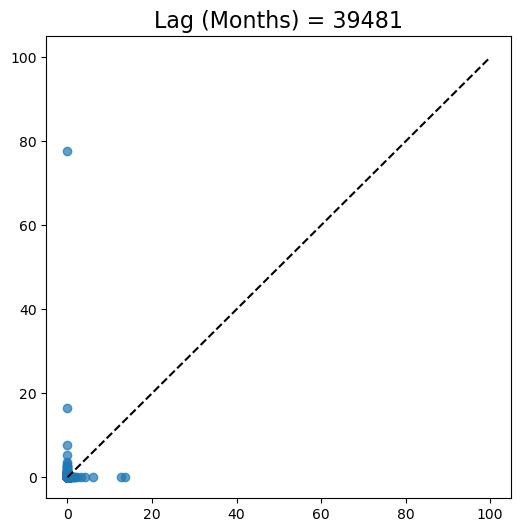

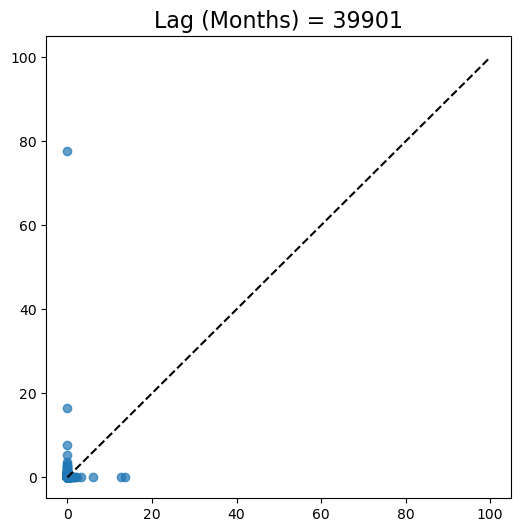

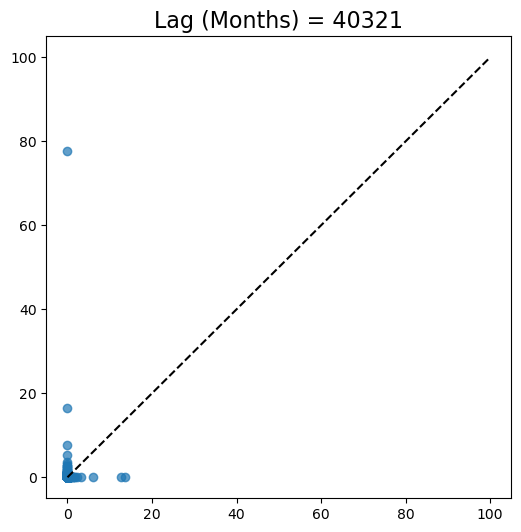

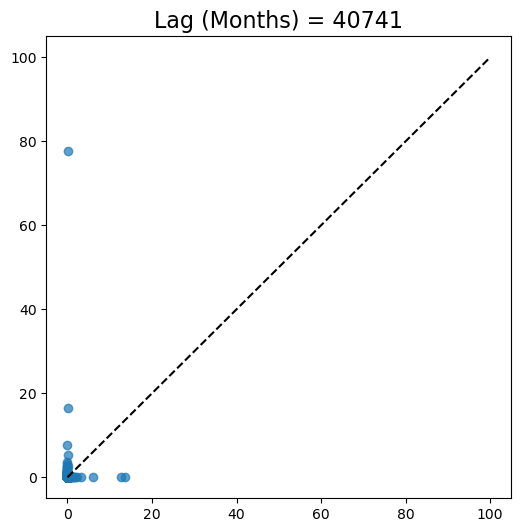

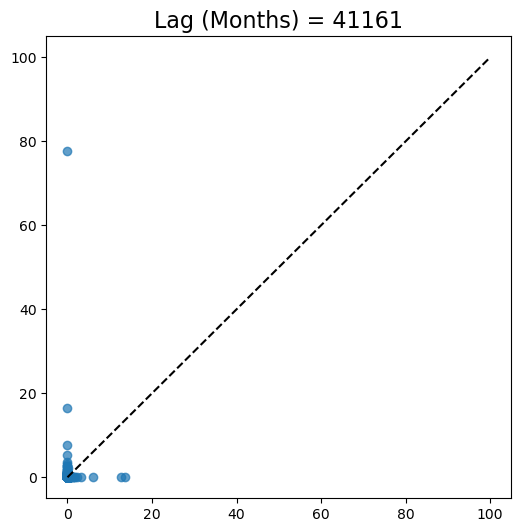

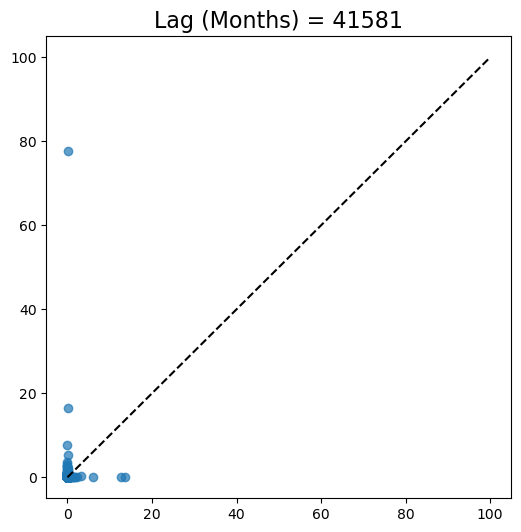

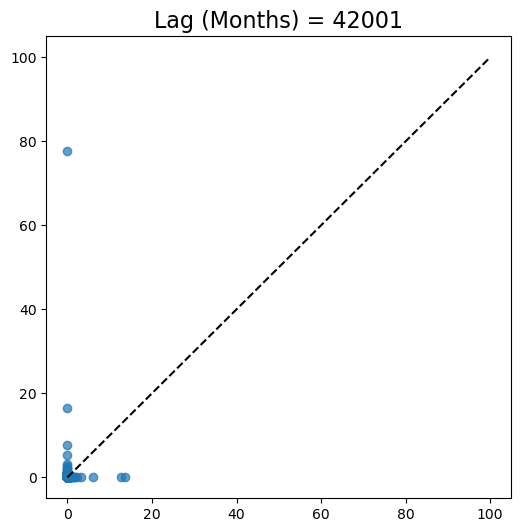

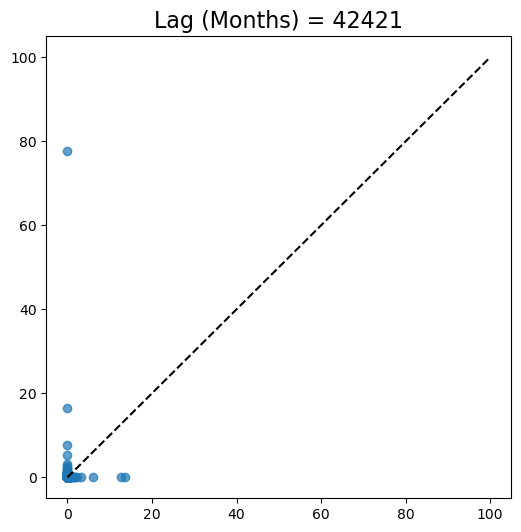

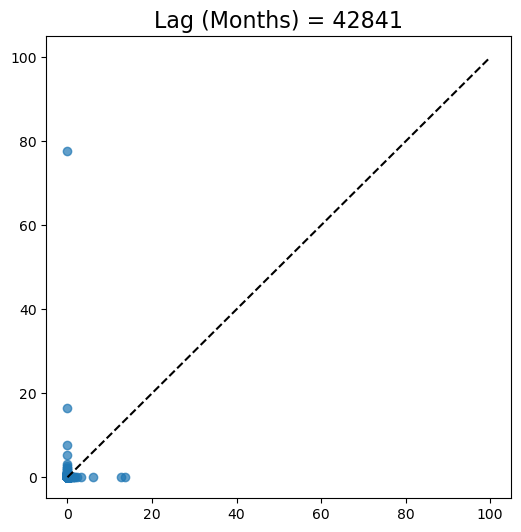

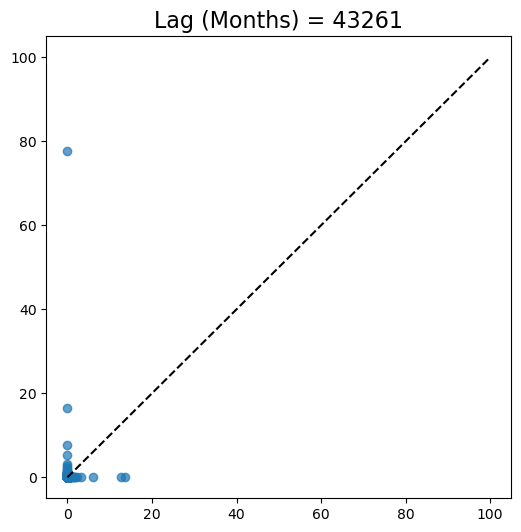

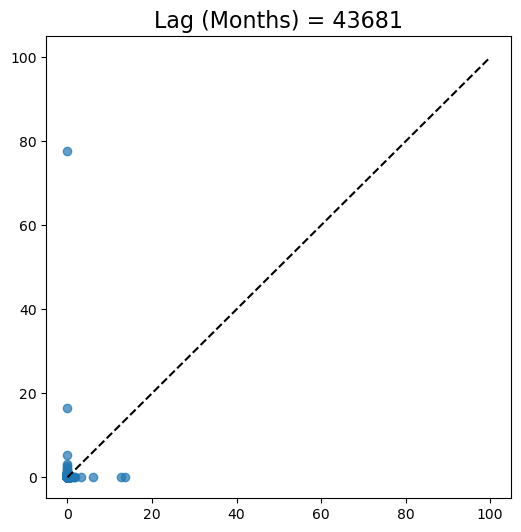

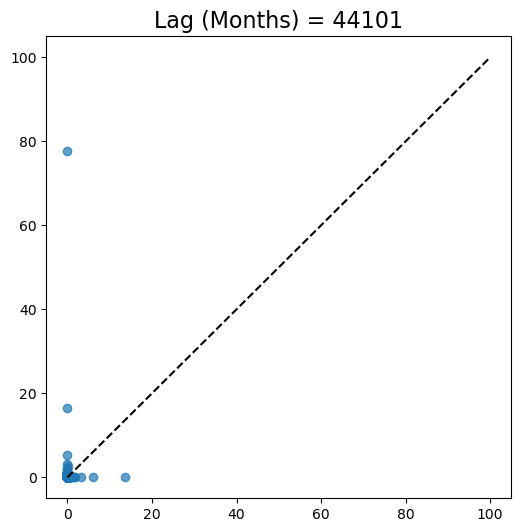

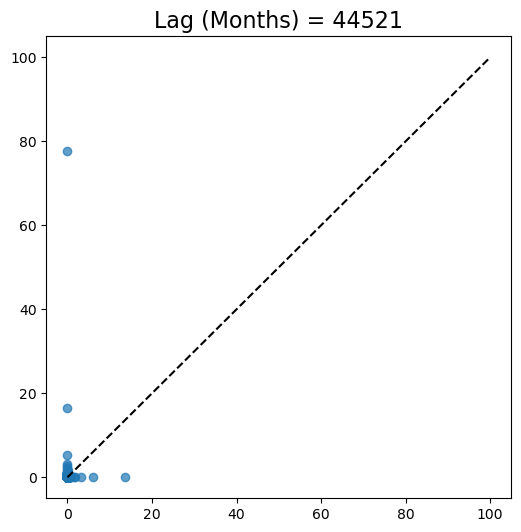

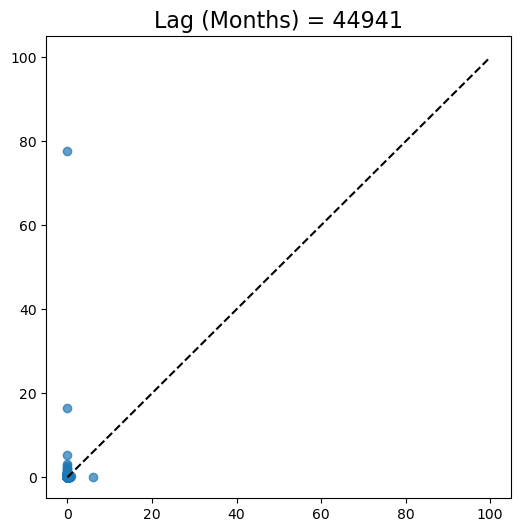

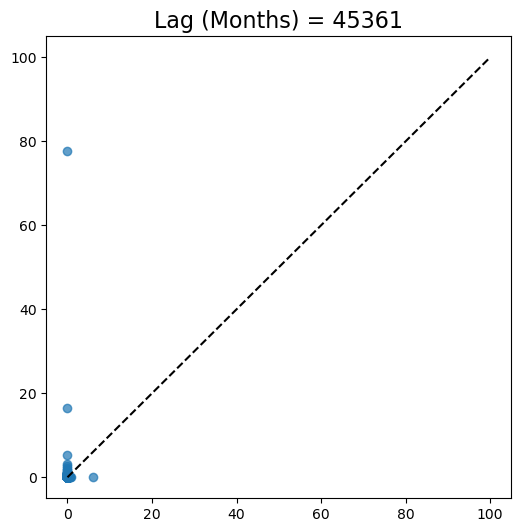

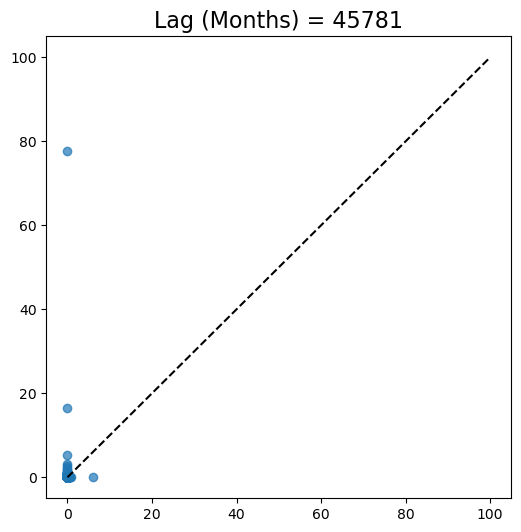

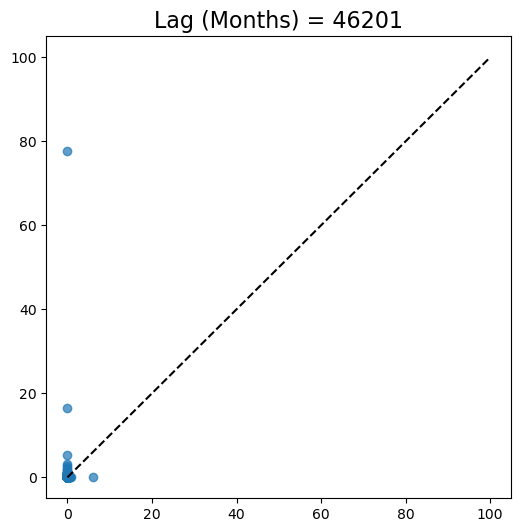

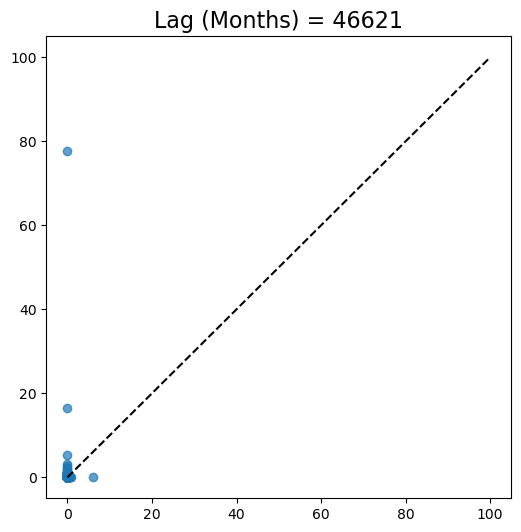

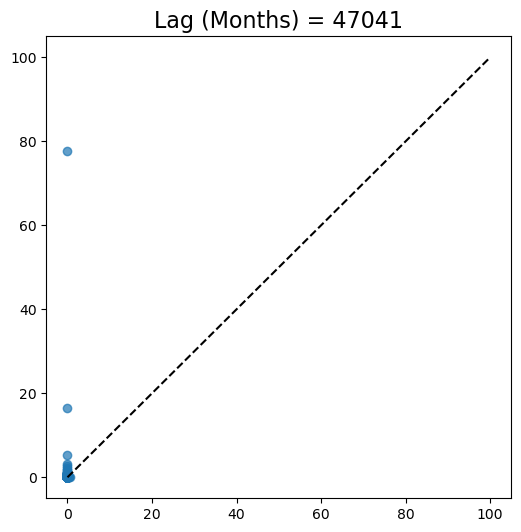

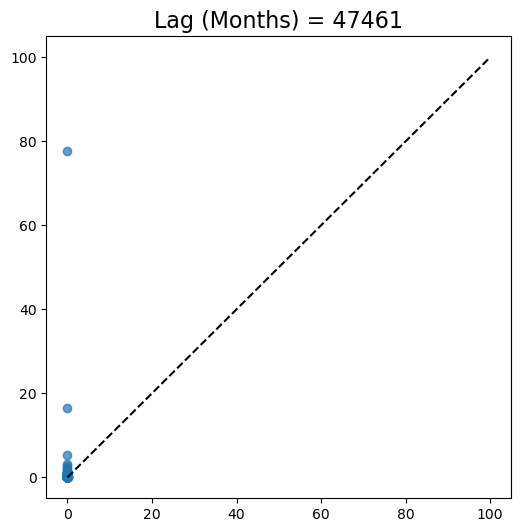

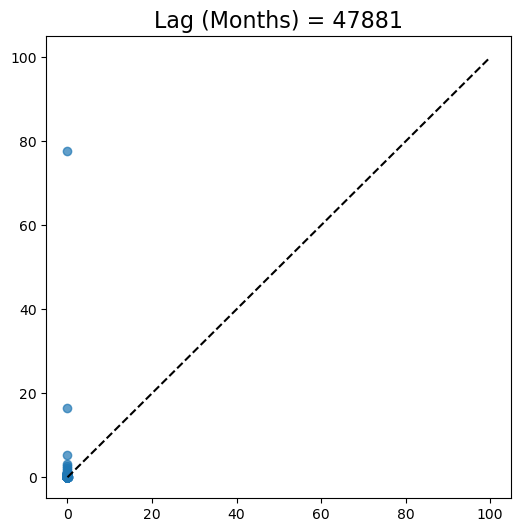

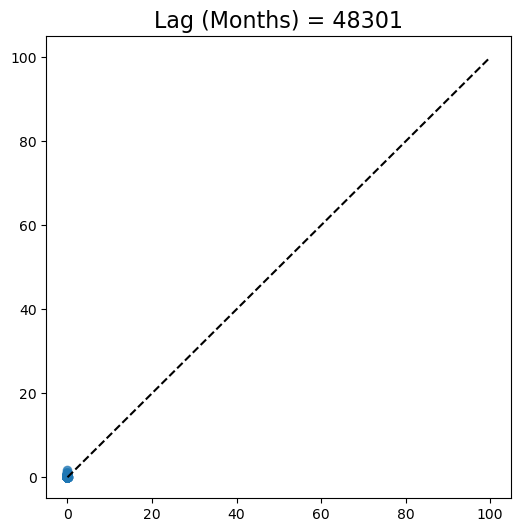

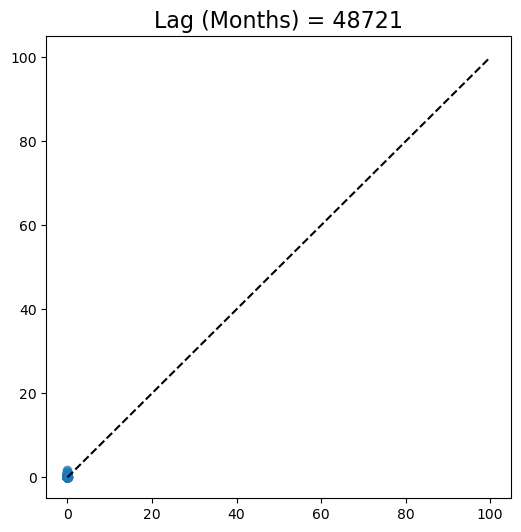

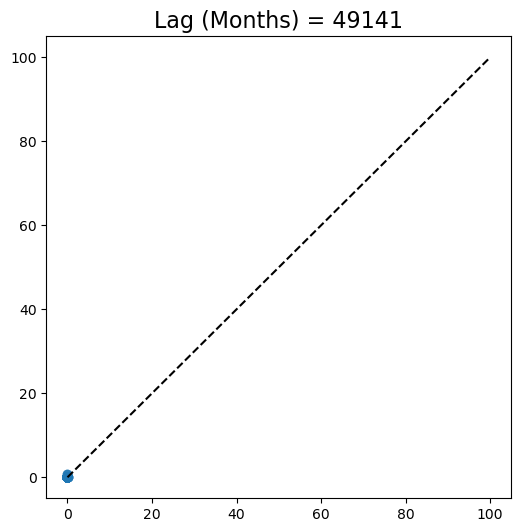

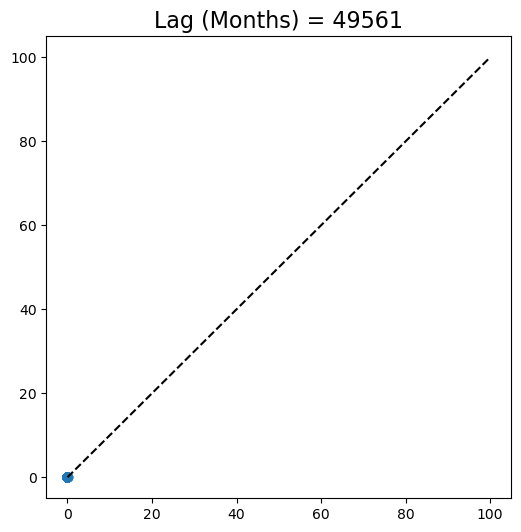

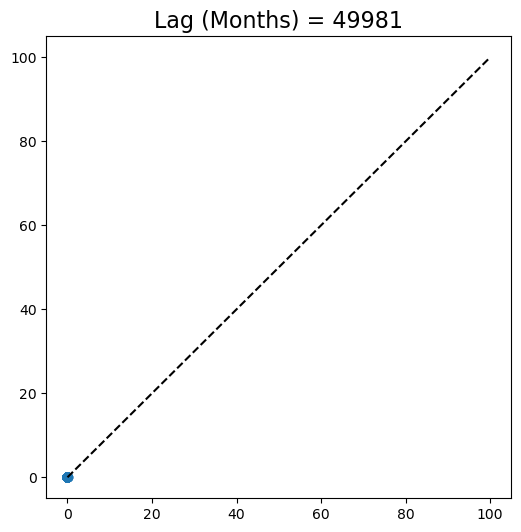

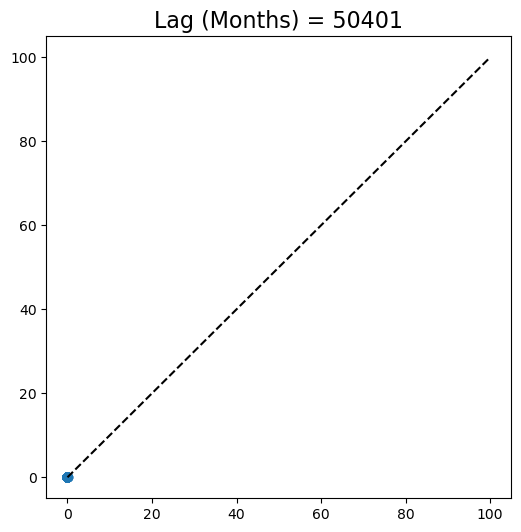

In [19]:
corr_coefs = []

for lag in range(1,50797,420): #data is divided into months
    corr_coefs.append(lagcorr(ab3, lag))

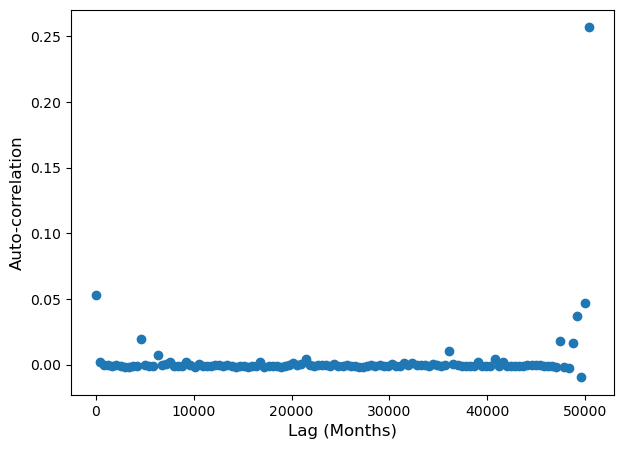

In [20]:
plt.figure(figsize=(7,5))

plt.scatter(range(1,50797,420), corr_coefs)

plt.xlabel("Lag (Months)", fontsize=12)
plt.ylabel("Auto-correlation", fontsize=12)

#plt.xticks(range(0,25,3), fontsize=10)
#plt.yticks(fontsize=10)

#plt.ylim([-1.1,1.1])

plt.show()
plt.close()

### After playing around with some numbers ab3 also does not display seasonality

## While you can see a trend when you look at the number of algae blooms per year, when you simpily try to see the algae blooms during various points in the year the data seems to have no seasonality and no trend. This means that the data is likely a stationary time series.

In [39]:
# double checking stationary status of data with three partitions
a = ab2[0:112]
b = ab2[223:440]
c = ab2[500:-1]

In [41]:
print('Mean and STD:',"{:e}".format(a.CELLCOUNT.mean()), "{:e}".format(a.CELLCOUNT.std()))

Mean and STD: 2.335907e+04 8.174916e+04


In [42]:
print('Mean and STD:',"{:e}".format(b.CELLCOUNT.mean()), "{:e}".format(b.CELLCOUNT.std()))

Mean and STD: 9.968387e+04 3.153615e+05


In [43]:
print('Mean and STD:',"{:e}".format(c.CELLCOUNT.mean()), "{:e}".format(c.CELLCOUNT.std()))

Mean and STD: 5.623193e+04 1.699459e+05


## Yeah I think the data is Strictly Stationary

In [75]:
import statsmodels.api as sm
# https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one
# graphs to show seasonal_decompose
def seasonal_decompose (y,deltat):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq',period=deltat)
    #decomposition = sm.tsa.seasonal_decompose(y)
    fig = decomposition.plot()
    fig.set_size_inches(14,7)
    plt.show()
    plt.close()



In [77]:
delta2 = timedelta(days=30)

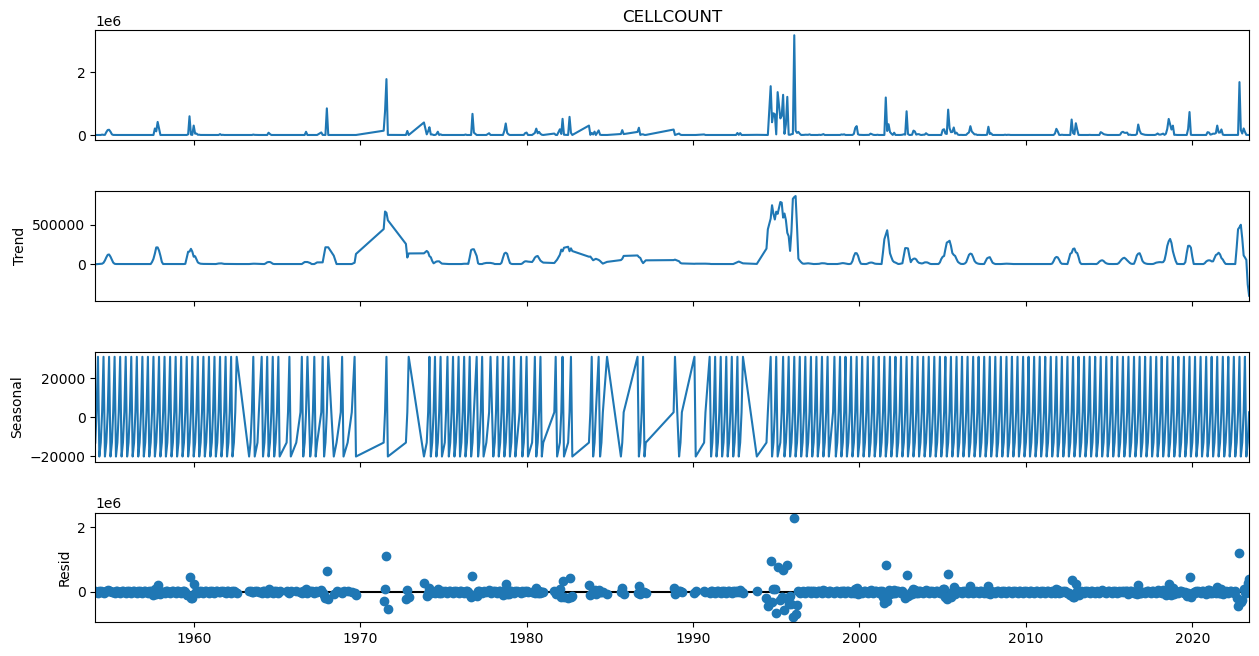

In [98]:
seasonal_decompose(ab2.CELLCOUNT,4)

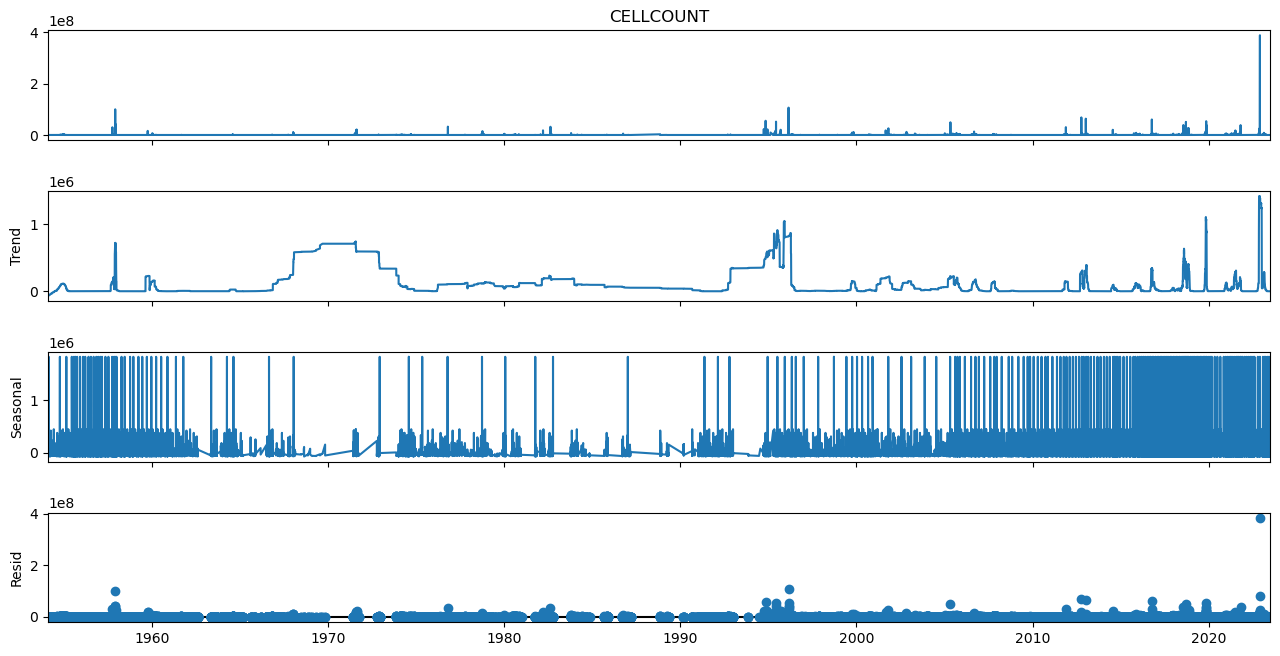

In [99]:
seasonal_decompose(ab3.CELLCOUNT,109*4)

In [89]:
len(ab3.reset_index()['SAMPLE_DATE'].dt.year.unique()) #how many years

69

In [93]:
len(ab3)/69 /12#roughly the number of timestamps per year

109.09057971014494

In [54]:
ab3['roll_avg'] = cellavg

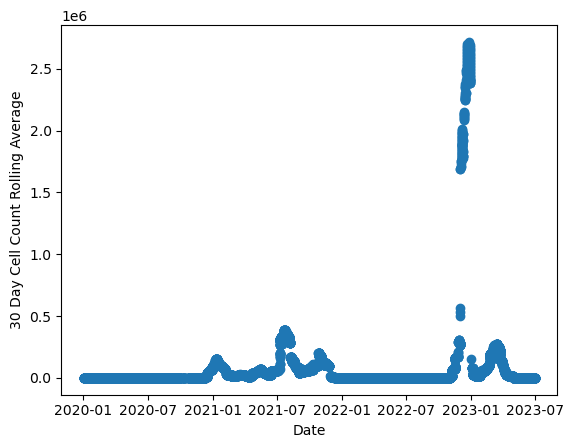

In [57]:
plt.scatter(ab3.loc[ab3.index > datetime(2020,1,1)].index, ab3.loc[ab3.index > datetime(2020,1,1)]['roll_avg'])
plt.xlabel('Date')
plt.ylabel('30 Day Cell Count Rolling Average')
plt.show()

In [64]:
from statsmodels.tsa.stattools import adfuller


def adf_test(timeseries): #null hypothesis is that there is a unit root (non-stationary)
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [61]:
adf_test(ab3['CELLCOUNT'])

Results of Dickey-Fuller Test:
Test Statistic                   -30.856418
p-value                            0.000000
#Lags Used                        65.000000
Number of Observations Used    90261.000000
Critical Value (1%)               -3.430422
Critical Value (5%)               -2.861572
Critical Value (10%)              -2.566787
dtype: float64


In [65]:
from statsmodels.tsa.stattools import kpss


def kpss_test(timeseries): #null hypothesis is that the data is stationary
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [63]:
kpss_test(ab3['CELLCOUNT'])

Results of KPSS Test:
Test Statistic            0.237939
p-value                   0.100000
Lags Used                91.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Peter Doze\AppData\Local\Temp\ipykernel_23852\1512460390.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")


In [ ]:
#if the pvalue is greater than 5 percent then you failed to reject the null hypothesis